In [1]:
# Tratamiento de datos
import pandas as pd
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")
# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_colwidth', None) #para ampliar el tamaño de las columnas
#importar la biblioteca de numpy:
import numpy as np
import os
import sys #permite navegar por el sistema
sys.path.append("../") #solo aplica al soporte
import re
#import src.soporte_EDA as se

# Visualización

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format # para redondearlo todo a 2 decimalesort matplotlib.pyplot as plt


In [ ]:
df_bicicletas = pd.read_csv(f"bicicletas_niños_products_ebay.csv")

In [3]:
display(df_bicicletas)

,Title,Sub_title,Price,Shipping_cost,Location,Sales,link
0,NaN,NaN,NaN,NaN,NaN,NaN,https://ebay.com/itm/123456?itmmeta=012DEW30YG0MEEKND7NH&hash=item123546:g:acwAA9KNiJowH:sc:ShippingMethodStandard!95008!US!-1&itmprp=enc%3AbgepL1tlUHjMGCVfSTGJh%2BzsVKeJ3CQk7NizDI4BZeppuFnmyS6Ijyp8lh%2FnEw%2BWqO7uTV1Q6izE1R0T54aV8j71F4xlWfVcGft4%2FiOQhtqVXA1rW6M1atPARQRmhqUxtEPJKhKtSFgI%2Bvwlzb0GwVCtkp%3ABlBMUObkmabpYw
1,NaN,NaN,NaN,NaN,NaN,NaN,https://ebay.com/itm/123456?itmmeta=012DEW30YG0MEEKND7NH&hash=item123546:g:acwAA9KNiJowH:sc:ShippingMethodStandard!95008!US!-1&itmprp=enc%3AbgepL1tlUHjMGCVfSTGJh%2BzsVKeJ3CQk7NizDI4BZeppuFnmyS6Ijyp8lh%2FnEw%2BWqO7uTV1Q6izE1R0T54aV8j71F4xlWfVcGft4%2FiOQhtqVXA1rW6M1atPARQRmhqUxtEPJKhKtSFgI%2Bvwlzb0GwVCtkp%3ABlBMUObkmabpYw
2,VEVOR Bicicleta de Equilibrio Niños 1~5 Años Acero al Carbono 950 x 455 x 570 mm,Totalmente nuevo | Vendedor profesional,"49,60 EUR",Envío gratis,NaN,NaN,https://www.ebay.es/itm/276633276567?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E6MA0H642BMC87WGF&hash=item4068a0d097:g:E1kAAOSwqQNm3q4r&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKld7DBHRPR9%2FtVvGqbhfpkIsEKhKFoU4jfiiLfepLOLKylR6AnBCtmXCK7lmtG%2B1O6HAJedctKZs%2FLIXH2FAcBKLR40tVEXiNNyjuBtT2lFawLpqTL6wrTTA3ywoCtVfR4VCA%2BT%2BY5avXjAL0hzDoKaC4UeVYoWqtYlZ2dH1YrVf6%2F7UlsasBo9r75jP%2BMDpSDOH97C028XLp2HC2%2BbzPGKP609fCOP971sepnPftEUwmY%2FN1pSjndprVeP3bOFz0xxDyNN7nAo%2BRCxp81i85nUoZkfCvIGCfAfy3VgppbHOQ%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ
3,BICICLETA INFANTIL 14 BMX NEGRO VERDE PARA NIÑOS DINO BIKES,Totalmente nuevo | Vendedor profesional,"115,00 EUR","+ 11,00 EUR de envío",desde Italia,NaN,https://www.ebay.es/itm/254984895140?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7ED2DH99XW1HHNN20J&hash=item3b5e48baa4:g:n8QAAOSwKIVnK7QP&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKnFkm%2F1oxNDUltjZ13XdH75u%2FawS%2FT04ufEsYxFC%2BV4rOvnM8M93dWemuJuMxQMgRvqyu8S8p5TA35tfm2DkMT2qmoG%2B4r7hdbv%2Bh8ACwUtRhasTbag8waKPraxOIurtY7OLcKAp9bxCFGmSYHekK5wa6ILKPVj7BZqkcJBEEwsh9IhOCx%2Fn8qFYBE2CJ4yI23C1EhGkj7s7Keybr6RQ9oc2YV7VaW6Uy%2BoS7ygdlGssvvU5MvHeOZumjjLupBqnAoSbpS8p3%2BCFXFSK1Iq56X0qN1ZJMlCDmKeuJUgBiZHaA%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ
4,Bicicleta para niños Altura ajustable Bicicleta para niños Lionelo Bart Air,Totalmente nuevo | Vendedor profesional,"120,99 EUR",Envío gratis,desde Alemania,NaN,https://www.ebay.es/itm/356224660928?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E9MDTY11C548Q2B8F&hash=item52f0a4f5c0:g:HJkAAOSwbrtnKULP&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKk%2BD6VZGX3dmE%2BBSelHFwFRi%2F2%2F8VEnwT41SP8k9dESCYl2pyMH73nuc4Y%2Bx8K4pKnw%2FzbMLgkVOQEXj6WOFEf9Xxb2AGCygkg%2BV34hHzOd%2Bh02NxYkll6QYbP%2BgGOEN%2BbKsB6%2BrnnlGCLSLVFPcT2KKM1gPAgFbyJHin%2FdU5wpjtuO8JeMtHH%2FR34AZTqLhy5NCiB31BZDVp3fI3svFpidpAASAI%2F5IMEYsN8akIRYYo%2FTjDqiGDRB00ejN5YqxPsSN%2BX41SBxfXRILqlwtgtZalsQDU09oQIvC1L9X%2BD9JA%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ
...,...,...,...,...,...,...,...
3718,Bicicletas Para Niños,Usado | Vendedor particular,"200,00 EUR",NaN,NaN,NaN,https://www.ebay.es/itm/405422157104?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5HK7G7G771BC339KJRDXB&hash=item5e650b2d30:g:CgUAAOSw13pnXyU7&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKk86ruMHtzjD0ra4fEiH80ZzBUe5vBT9iReVuDiGNcIhzBZ4K9prORQWdfCztiiSr29t050BYol1ag6JCp13gcfJEzwT5kCr5OUnLMFFY7sj1KbzaW4uceddQZc0tzdpPmqn4IYSU86IrK3laICAoSJIb4S0GSCBg%2BxW4%2FOWXgdxh%2FfywzfU04WsXg1wUARiEmSlHc%2BmyURQZhDSBPbr8G37DTb2Uq5FwmuyZyuBTpqcXRuzK0rYUt3w2OAgVRbWS0%3D%7Ctkp%3ABk9SR_KzxoWTZQ
3719,"Bicicleta niños BTwin con cambio 5 piñones, ruedas gastadas",Usado | Vendedor particular,"50,00 EUR",NaN,NaN,NaN,https://www.ebay.es/itm/334598863781?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5HK7GM9J3WG8VYE925ZY2&hash=item4de7a57ba5:g:mlgAAOSwvBpjUHCH&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKnCNhK8q1rZcnLHvKHKjSjnnz3zZg%2FvGOAKg8zUsKgKGDRINUsPk1hx2JGTU%2Fpn8Rrel%2F0QGblqIPY4KifLSWzvGARGAyItFLZtGp1Glk%2FsCiG6rqDVJfyQJvZkEGHhmlxiDwGUYK2E6JvNFnKv3HImZX8EGNvkwJpUFIc6z%2Fa5MiCizzdXuAcJdjEiph40GNjHUw9be5bT8uG%2FslENwwOIPaIY39DjxzT9%2FsYtFMtKbdIAjgLZ8OGXq5yNlC8FLcNU6kfShu

# 1. Limpieza

In [4]:
df_bicicletas_filtrado = df_bicicletas.dropna(subset=['Title']).reset_index()
df_bicicletas_filtrado

,index,Title,Sub_title,Price,Shipping_cost,Location,Sales,link
0,2,VEVOR Bicicleta de Equilibrio Niños 1~5 Años Acero al Carbono 950 x 455 x 570 mm,Totalmente nuevo | Vendedor profesional,"49,60 EUR",Envío gratis,NaN,NaN,https://www.ebay.es/itm/276633276567?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E6MA0H642BMC87WGF&hash=item4068a0d097:g:E1kAAOSwqQNm3q4r&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKld7DBHRPR9%2FtVvGqbhfpkIsEKhKFoU4jfiiLfepLOLKylR6AnBCtmXCK7lmtG%2B1O6HAJedctKZs%2FLIXH2FAcBKLR40tVEXiNNyjuBtT2lFawLpqTL6wrTTA3ywoCtVfR4VCA%2BT%2BY5avXjAL0hzDoKaC4UeVYoWqtYlZ2dH1YrVf6%2F7UlsasBo9r75jP%2BMDpSDOH97C028XLp2HC2%2BbzPGKP609fCOP971sepnPftEUwmY%2FN1pSjndprVeP3bOFz0xxDyNN7nAo%2BRCxp81i85nUoZkfCvIGCfAfy3VgppbHOQ%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ
1,3,BICICLETA INFANTIL 14 BMX NEGRO VERDE PARA NIÑOS DINO BIKES,Totalmente nuevo | Vendedor profesional,"115,00 EUR","+ 11,00 EUR de envío",desde Italia,NaN,https://www.ebay.es/itm/254984895140?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7ED2DH99XW1HHNN20J&hash=item3b5e48baa4:g:n8QAAOSwKIVnK7QP&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKnFkm%2F1oxNDUltjZ13XdH75u%2FawS%2FT04ufEsYxFC%2BV4rOvnM8M93dWemuJuMxQMgRvqyu8S8p5TA35tfm2DkMT2qmoG%2B4r7hdbv%2Bh8ACwUtRhasTbag8waKPraxOIurtY7OLcKAp9bxCFGmSYHekK5wa6ILKPVj7BZqkcJBEEwsh9IhOCx%2Fn8qFYBE2CJ4yI23C1EhGkj7s7Keybr6RQ9oc2YV7VaW6Uy%2BoS7ygdlGssvvU5MvHeOZumjjLupBqnAoSbpS8p3%2BCFXFSK1Iq56X0qN1ZJMlCDmKeuJUgBiZHaA%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ
2,4,Bicicleta para niños Altura ajustable Bicicleta para niños Lionelo Bart Air,Totalmente nuevo | Vendedor profesional,"120,99 EUR",Envío gratis,desde Alemania,NaN,https://www.ebay.es/itm/356224660928?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E9MDTY11C548Q2B8F&hash=item52f0a4f5c0:g:HJkAAOSwbrtnKULP&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKk%2BD6VZGX3dmE%2BBSelHFwFRi%2F2%2F8VEnwT41SP8k9dESCYl2pyMH73nuc4Y%2Bx8K4pKnw%2FzbMLgkVOQEXj6WOFEf9Xxb2AGCygkg%2BV34hHzOd%2Bh02NxYkll6QYbP%2BgGOEN%2BbKsB6%2BrnnlGCLSLVFPcT2KKM1gPAgFbyJHin%2FdU5wpjtuO8JeMtHH%2FR34AZTqLhy5NCiB31BZDVp3fI3svFpidpAASAI%2F5IMEYsN8akIRYYo%2FTjDqiGDRB00ejN5YqxPsSN%2BX41SBxfXRILqlwtgtZalsQDU09oQIvC1L9X%2BD9JA%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ
3,5,20 Pulgadas BMX Niños Bicicleta Freestyle Rueda KHE Cosmic Negro Affix Rotor,Totalmente nuevo | Vendedor profesional,"278,52 EUR",Envío gratis,desde Alemania,NaN,https://www.ebay.es/itm/167218541165?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E1SND774APT0GWS23&hash=item26ef00726d:g:iPoAAOSwqSpnk3fP&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKlEkTj4Bzyv9YPAmDj3BTJc8NHsrH9oH1iwsILfsNsxj87nI0fsovzUMiQ0QKNe3izNeUlIF3aZhreoxIBPlxg94hfx9LZuINPm39ZsUcLdV56EfFzGrlU%2B9eSyL0UMt1pjPlmxCI%2BerTBL0MGZ4q0YPX8FOomJUuvWtPEYVT0rzmDgSeax0usQfOniommSJlF5l9OU3AwtpZKJLm2lYMVJ%2BpYDYp3BbDfwQJNsrK1DCQUqJhTGkmVlpFUp0q5ESHU%3D%7Ctkp%3ABk9SR_TzooWTZQ
4,6,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,Totalmente nuevo | Vendedor profesional,"200,55 EUR","+ 15,12 EUR de envío",desde Alemania,NaN,https://www.ebay.es/itm/146346937446?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7EWQQX0TY39Y9XRNTK&hash=item2212f50c66:g:SBMAAOSwJlpknUgf&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKlbd721VbtqbrHQ8n26DLVtLr6Gz3x59yDM8NjQa8sGcZtvXOgK9lLNqIYupeZZdLNxdjwzeOV9XD%2BeK9R8bEEFxwf8by%2Fj7X7ppQtSNgJOE3xRKZvGHNFJp%2BDYZAJ3mhUtDHje4dT3TLl9lFqzxuHUlK%2FzH8yUmgaFlh4KF1y%2BtyNbOls76KwkkgZPgyJbKoHDqc2VMfgQiy1epGQgpDmJVkTaBajVJzDhcmP9UrZNumuE4zyBJUPU%2F9ck7CxEqp3DRi5CP4jCPc5jFyZCEbWGAVrdHMTSzWdrhPN1um5fjg%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ
...,...,...,...,...,...,...,...,...
3598,3718,Bicicletas Para Niños,Usado | Vendedor particular,"200,00 EUR",NaN,NaN,NaN,https://www.ebay.es/itm/405422157104?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5HK7G7G771BC339KJRDXB&hash=item5e650b2d30:g:CgUAAOSw13pnXyU7&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKk86ruMHtzjD0ra4fEiH80ZzBUe5vBT9iReVuDiGNcIhzBZ4K9prORQWdfCztiiSr29t050BYol1ag6JCp13gcfJEzwT5kCr5OUnLMFFY7sj1KbzaW4uceddQZc0tzdpPmqn4IYSU86IrK3laICAoSJIb4S0GSCBg%2Bx

In [5]:
df_bicicletas_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          3603 non-null   int64 
 1   Title          3603 non-null   object
 2   Sub_title      3595 non-null   object
 3   Price          3603 non-null   object
 4   Shipping_cost  3581 non-null   object
 5   Location       3560 non-null   object
 6   Sales          10 non-null     object
 7   link           3603 non-null   object
dtypes: int64(1), object(7)
memory usage: 225.3+ KB


In [6]:
#divido la subcategoría en dos columnas diferentes:state y seller_type
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado.Sub_title.str.split('|',expand=True)[0]
df_bicicletas_filtrado['Seller_type'] = df_bicicletas_filtrado.Sub_title.str.split('|',expand=True)[1]

In [7]:
df_bicicletas_filtrado

,index,Title,Sub_title,Price,Shipping_cost,Location,Sales,link,State,Seller_type
0,2,VEVOR Bicicleta de Equilibrio Niños 1~5 Años Acero al Carbono 950 x 455 x 570 mm,Totalmente nuevo | Vendedor profesional,"49,60 EUR",Envío gratis,NaN,NaN,https://www.ebay.es/itm/276633276567?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E6MA0H642BMC87WGF&hash=item4068a0d097:g:E1kAAOSwqQNm3q4r&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKld7DBHRPR9%2FtVvGqbhfpkIsEKhKFoU4jfiiLfepLOLKylR6AnBCtmXCK7lmtG%2B1O6HAJedctKZs%2FLIXH2FAcBKLR40tVEXiNNyjuBtT2lFawLpqTL6wrTTA3ywoCtVfR4VCA%2BT%2BY5avXjAL0hzDoKaC4UeVYoWqtYlZ2dH1YrVf6%2F7UlsasBo9r75jP%2BMDpSDOH97C028XLp2HC2%2BbzPGKP609fCOP971sepnPftEUwmY%2FN1pSjndprVeP3bOFz0xxDyNN7nAo%2BRCxp81i85nUoZkfCvIGCfAfy3VgppbHOQ%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional
1,3,BICICLETA INFANTIL 14 BMX NEGRO VERDE PARA NIÑOS DINO BIKES,Totalmente nuevo | Vendedor profesional,"115,00 EUR","+ 11,00 EUR de envío",desde Italia,NaN,https://www.ebay.es/itm/254984895140?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7ED2DH99XW1HHNN20J&hash=item3b5e48baa4:g:n8QAAOSwKIVnK7QP&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKnFkm%2F1oxNDUltjZ13XdH75u%2FawS%2FT04ufEsYxFC%2BV4rOvnM8M93dWemuJuMxQMgRvqyu8S8p5TA35tfm2DkMT2qmoG%2B4r7hdbv%2Bh8ACwUtRhasTbag8waKPraxOIurtY7OLcKAp9bxCFGmSYHekK5wa6ILKPVj7BZqkcJBEEwsh9IhOCx%2Fn8qFYBE2CJ4yI23C1EhGkj7s7Keybr6RQ9oc2YV7VaW6Uy%2BoS7ygdlGssvvU5MvHeOZumjjLupBqnAoSbpS8p3%2BCFXFSK1Iq56X0qN1ZJMlCDmKeuJUgBiZHaA%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional
2,4,Bicicleta para niños Altura ajustable Bicicleta para niños Lionelo Bart Air,Totalmente nuevo | Vendedor profesional,"120,99 EUR",Envío gratis,desde Alemania,NaN,https://www.ebay.es/itm/356224660928?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E9MDTY11C548Q2B8F&hash=item52f0a4f5c0:g:HJkAAOSwbrtnKULP&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKk%2BD6VZGX3dmE%2BBSelHFwFRi%2F2%2F8VEnwT41SP8k9dESCYl2pyMH73nuc4Y%2Bx8K4pKnw%2FzbMLgkVOQEXj6WOFEf9Xxb2AGCygkg%2BV34hHzOd%2Bh02NxYkll6QYbP%2BgGOEN%2BbKsB6%2BrnnlGCLSLVFPcT2KKM1gPAgFbyJHin%2FdU5wpjtuO8JeMtHH%2FR34AZTqLhy5NCiB31BZDVp3fI3svFpidpAASAI%2F5IMEYsN8akIRYYo%2FTjDqiGDRB00ejN5YqxPsSN%2BX41SBxfXRILqlwtgtZalsQDU09oQIvC1L9X%2BD9JA%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional
3,5,20 Pulgadas BMX Niños Bicicleta Freestyle Rueda KHE Cosmic Negro Affix Rotor,Totalmente nuevo | Vendedor profesional,"278,52 EUR",Envío gratis,desde Alemania,NaN,https://www.ebay.es/itm/167218541165?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E1SND774APT0GWS23&hash=item26ef00726d:g:iPoAAOSwqSpnk3fP&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKlEkTj4Bzyv9YPAmDj3BTJc8NHsrH9oH1iwsILfsNsxj87nI0fsovzUMiQ0QKNe3izNeUlIF3aZhreoxIBPlxg94hfx9LZuINPm39ZsUcLdV56EfFzGrlU%2B9eSyL0UMt1pjPlmxCI%2BerTBL0MGZ4q0YPX8FOomJUuvWtPEYVT0rzmDgSeax0usQfOniommSJlF5l9OU3AwtpZKJLm2lYMVJ%2BpYDYp3BbDfwQJNsrK1DCQUqJhTGkmVlpFUp0q5ESHU%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional
4,6,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,Totalmente nuevo | Vendedor profesional,"200,55 EUR","+ 15,12 EUR de envío",desde Alemania,NaN,https://www.ebay.es/itm/146346937446?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7EWQQX0TY39Y9XRNTK&hash=item2212f50c66:g:SBMAAOSwJlpknUgf&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKlbd721VbtqbrHQ8n26DLVtLr6Gz3x59yDM8NjQa8sGcZtvXOgK9lLNqIYupeZZdLNxdjwzeOV9XD%2BeK9R8bEEFxwf8by%2Fj7X7ppQtSNgJOE3xRKZvGHNFJp%2BDYZAJ3mhUtDHje4dT3TLl9lFqzxuHUlK%2FzH8yUmgaFlh4KF1y%2BtyNbOls76KwkkgZPgyJbKoHDqc2VMfgQiy1epGQgpDmJVkTaBajVJzDhcmP9UrZNumuE4zyBJUPU%2F9ck7CxEqp3DRi5CP4jCPc5jFyZCEbWGAVrdHMTSzWdrhPN1um5fjg%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional
...,...,...,...,...,...,...,...,...,...,...
3598,3718,Bicicletas Para Niños,Usado | Vendedor particular,"200,00 EUR",NaN,NaN,NaN,https://www.ebay.es/itm/405422157104?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5HK7G7G771BC339KJRDXB&hash=item5e650b2d30:g:CgUAAOSw13

## Tratamiento de las columnas numéricas para convertirlas en números

In [8]:

#Tratamiento columna Shipping_cost
df_bicicletas_filtrado['Shipping_cost'] = df_bicicletas_filtrado['Shipping_cost'].str.replace(' EUR de envío', '') #sustituyo " EUR de envio" por nada
df_bicicletas_filtrado['Shipping_cost'] = df_bicicletas_filtrado['Shipping_cost'].str.replace('+', '') #sustituyo "+" por nada
df_bicicletas_filtrado['Shipping_cost'] = df_bicicletas_filtrado['Shipping_cost'].str.replace(',', '.') #sustituyo "," por '.'
df_bicicletas_filtrado['Shipping_cost'] = df_bicicletas_filtrado['Shipping_cost'].str.strip() #elimino espacios vacios al principio y al final
df_bicicletas_filtrado['Shipping_cost'] = df_bicicletas_filtrado['Shipping_cost'].str.replace('Envío gratis', '0.00') #sustituyo "Envío gratis" por '.'

def conversion_float(texto):
    try:
        return float(texto)
    except:
        return np.nan

df_bicicletas_filtrado["Shipping_cost"] = df_bicicletas_filtrado["Shipping_cost"].apply(conversion_float) #la convierto en tipo float


In [9]:

#Tratamiento columna Price:
df_bicicletas_filtrado['Price'] = df_bicicletas_filtrado['Price'].str.replace(' EUR', '') #sustituyo " EUR" por nada
df_bicicletas_filtrado['Price'] = df_bicicletas_filtrado['Price'].str.replace(',', '.') #sustituyo "," por '.'
df_bicicletas_filtrado['Price'] = df_bicicletas_filtrado['Price'].str.strip() #elimino espacios vacios al principio y al final

df_bicicletas_filtrado['Starting_price'] = df_bicicletas_filtrado.Price.str.split(' a ',expand=True)[0]
df_bicicletas_filtrado['Ending_price'] = df_bicicletas_filtrado.Price.str.split(' a ',expand=True)[1]

df_bicicletas_filtrado["Price"] = df_bicicletas_filtrado["Price"].apply(conversion_float) #la convierto en tipo float



In [10]:
df_bicicletas_filtrado

,index,Title,Sub_title,Price,Shipping_cost,Location,Sales,link,State,Seller_type,Starting_price,Ending_price
0,2,VEVOR Bicicleta de Equilibrio Niños 1~5 Años Acero al Carbono 950 x 455 x 570 mm,Totalmente nuevo | Vendedor profesional,49.60,0.00,NaN,NaN,https://www.ebay.es/itm/276633276567?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E6MA0H642BMC87WGF&hash=item4068a0d097:g:E1kAAOSwqQNm3q4r&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKld7DBHRPR9%2FtVvGqbhfpkIsEKhKFoU4jfiiLfepLOLKylR6AnBCtmXCK7lmtG%2B1O6HAJedctKZs%2FLIXH2FAcBKLR40tVEXiNNyjuBtT2lFawLpqTL6wrTTA3ywoCtVfR4VCA%2BT%2BY5avXjAL0hzDoKaC4UeVYoWqtYlZ2dH1YrVf6%2F7UlsasBo9r75jP%2BMDpSDOH97C028XLp2HC2%2BbzPGKP609fCOP971sepnPftEUwmY%2FN1pSjndprVeP3bOFz0xxDyNN7nAo%2BRCxp81i85nUoZkfCvIGCfAfy3VgppbHOQ%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,49.60,None
1,3,BICICLETA INFANTIL 14 BMX NEGRO VERDE PARA NIÑOS DINO BIKES,Totalmente nuevo | Vendedor profesional,115.00,11.00,desde Italia,NaN,https://www.ebay.es/itm/254984895140?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7ED2DH99XW1HHNN20J&hash=item3b5e48baa4:g:n8QAAOSwKIVnK7QP&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKnFkm%2F1oxNDUltjZ13XdH75u%2FawS%2FT04ufEsYxFC%2BV4rOvnM8M93dWemuJuMxQMgRvqyu8S8p5TA35tfm2DkMT2qmoG%2B4r7hdbv%2Bh8ACwUtRhasTbag8waKPraxOIurtY7OLcKAp9bxCFGmSYHekK5wa6ILKPVj7BZqkcJBEEwsh9IhOCx%2Fn8qFYBE2CJ4yI23C1EhGkj7s7Keybr6RQ9oc2YV7VaW6Uy%2BoS7ygdlGssvvU5MvHeOZumjjLupBqnAoSbpS8p3%2BCFXFSK1Iq56X0qN1ZJMlCDmKeuJUgBiZHaA%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,115.00,None
2,4,Bicicleta para niños Altura ajustable Bicicleta para niños Lionelo Bart Air,Totalmente nuevo | Vendedor profesional,120.99,0.00,desde Alemania,NaN,https://www.ebay.es/itm/356224660928?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E9MDTY11C548Q2B8F&hash=item52f0a4f5c0:g:HJkAAOSwbrtnKULP&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKk%2BD6VZGX3dmE%2BBSelHFwFRi%2F2%2F8VEnwT41SP8k9dESCYl2pyMH73nuc4Y%2Bx8K4pKnw%2FzbMLgkVOQEXj6WOFEf9Xxb2AGCygkg%2BV34hHzOd%2Bh02NxYkll6QYbP%2BgGOEN%2BbKsB6%2BrnnlGCLSLVFPcT2KKM1gPAgFbyJHin%2FdU5wpjtuO8JeMtHH%2FR34AZTqLhy5NCiB31BZDVp3fI3svFpidpAASAI%2F5IMEYsN8akIRYYo%2FTjDqiGDRB00ejN5YqxPsSN%2BX41SBxfXRILqlwtgtZalsQDU09oQIvC1L9X%2BD9JA%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,120.99,None
3,5,20 Pulgadas BMX Niños Bicicleta Freestyle Rueda KHE Cosmic Negro Affix Rotor,Totalmente nuevo | Vendedor profesional,278.52,0.00,desde Alemania,NaN,https://www.ebay.es/itm/167218541165?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E1SND774APT0GWS23&hash=item26ef00726d:g:iPoAAOSwqSpnk3fP&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKlEkTj4Bzyv9YPAmDj3BTJc8NHsrH9oH1iwsILfsNsxj87nI0fsovzUMiQ0QKNe3izNeUlIF3aZhreoxIBPlxg94hfx9LZuINPm39ZsUcLdV56EfFzGrlU%2B9eSyL0UMt1pjPlmxCI%2BerTBL0MGZ4q0YPX8FOomJUuvWtPEYVT0rzmDgSeax0usQfOniommSJlF5l9OU3AwtpZKJLm2lYMVJ%2BpYDYp3BbDfwQJNsrK1DCQUqJhTGkmVlpFUp0q5ESHU%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,278.52,None
4,6,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,Totalmente nuevo | Vendedor profesional,200.55,15.12,desde Alemania,NaN,https://www.ebay.es/itm/146346937446?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7EWQQX0TY39Y9XRNTK&hash=item2212f50c66:g:SBMAAOSwJlpknUgf&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKlbd721VbtqbrHQ8n26DLVtLr6Gz3x59yDM8NjQa8sGcZtvXOgK9lLNqIYupeZZdLNxdjwzeOV9XD%2BeK9R8bEEFxwf8by%2Fj7X7ppQtSNgJOE3xRKZvGHNFJp%2BDYZAJ3mhUtDHje4dT3TLl9lFqzxuHUlK%2FzH8yUmgaFlh4KF1y%2BtyNbOls76KwkkgZPgyJbKoHDqc2VMfgQiy1epGQgpDmJVkTaBajVJzDhcmP9UrZNumuE4zyBJUPU%2F9ck7CxEqp3DRi5CP4jCPc5jFyZCEbWGAVrdHMTSzWdrhPN1um5fjg%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,200.55,None
...,...,...,...,...,...,...,...,...,...,...,...,...
3598,3718,Bicicletas Para Niños,Usado | Vendedor particular,200.00,NaN,NaN,NaN,https://www.ebay.es/itm/405422157104?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5HK7G7G771BC339KJRDXB&hash=item5e650b2d30:g:CgUAAOSw1

In [11]:
lista_indices_precios_vacios_sup_1000 = df_bicicletas_filtrado[df_bicicletas_filtrado.Price.isnull()][df_bicicletas_filtrado.Ending_price.isnull()].index
lista_indices_precios_vacios_sup_1000

Index([241, 300, 577, 875, 1095, 1222, 1277, 1533, 1594, 1699, 2202, 3445,
       3558],
      dtype='int64')

In [12]:
df_bicicletas_filtrado[df_bicicletas_filtrado.Price.isnull()][df_bicicletas_filtrado.Ending_price.isnull()]

,index,Title,Sub_title,Price,Shipping_cost,Location,Sales,link,State,Seller_type,Starting_price,Ending_price
241,249,Bicicleta de montaña para niños marco de carbono ligero 20 pulgadas marco de montaña bicicleta para niños,Totalmente nuevo | Vendedor profesional,NaN,0.00,desde China,NaN,https://www.ebay.es/itm/225715612533?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC596EMFRQ9BV40YRTK5VTD&hash=item348db2eb75:g:FlcAAOSwAPFk0giG&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKkiFFMzcipMVPavs4MaQ3T%2FM4c%2F%2BIQUbsumgCwBmF9IN3VY4rdvXXjV5FiGey7WbYPRzO3bZNSdYql2BgFhqC%2BBSZ39k%2FvoR%2FiIOllS2NuOsGaDa4L%2BRMD9iOeF%2BvONMi8YJmfCsDoqfG7bcw3LaL21LXT9Acej7Wa3P436PS7zglFpe2hz6bhz5cLqRk0bZ6X1cWvFT7B2v6AvgBncVkepBIO5%2B%2FxnpoK2rD%2Bu7xmyvmffsPzgYdmHnGrbTVpCus7Fu7B%2BWXWpkopJPFQOsNgQo1V2hkdqMIM6cW9qb9FxKA%3D%3D%7Ctkp%3ABk9SR8TnpIWTZQ,Totalmente nuevo,Vendedor profesional,1.399.04,None
300,310,Bicicleta de montaña para niños marco de carbono ligero 20 pulgadas marco de montaña bicicleta para niños,Totalmente nuevo | Vendedor profesional,NaN,0.00,desde China,NaN,https://www.ebay.es/itm/225715612533?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC59B0HZXR8QN3C6ES0J683&hash=item348db2eb75:g:FlcAAOSwAPFk0giG&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKkiFFMzcipMVPavs4MaQ3T%2FM4c%2F%2BIQUbsumgCwBmF9IN3VY4rdvXXjV5FiGey7WbYPRzO3bZNSdYql2BgFhqC%2BBSZ39k%2FvoR%2FiIOllS2NuOsGaDa4L%2BRMD9iOeF%2BvONMi8CxWAi%2B2YsBCSd2NnIX10BHPICNJWfeuwuF73LppoUkB3tkeQgKRw%2FAiGfo6qBc4Zz4HGw9IT8EGE1ERICw6cvk6TEcwailsFAahFNBBF0hCsMklfMtFGw35UAWCJZvZRjhy7pmsGsKEo07wvdCnXXI4aRTkwZcmN5YoKoksbofQ%3D%3D%7Ctkp%3ABk9SR8CwpYWTZQ,Totalmente nuevo,Vendedor profesional,1.399.04,None
577,597,Bicicleta para niños de 20 pulgadas bicicleta para niños MTB bicicleta bicicleta para niños retirada,Totalmente nuevo | Vendedor profesional,NaN,0.00,desde China,NaN,https://www.ebay.es/itm/305901615552?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5A2SB2CCR734DP1YECS5A&hash=item47392839c0:g:538AAOSwYxlnMsFX&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKmgdFWj8jq7Uv2dqRfWwXDnR7COxdVS31noqD8lhoVBATmDQLRI5hzeegMZHj0VnUGqX3whIQ1YVm0IVVmayhm%2BA2FjcwfZTdv4I%2Byi7HVteZkyVBbl%2FofMseuRPdemIOWKjmb5iYe7swobFbwmnWBqC%2BaMaJ7lpLPZR89jmJadiIdw3h%2Bp9OnvAFo6%2FKClKolEjMbP1TPQwghDX2xKREz%2Fsbvm%2FV6jrWQvI4JVD5XqLsIJM3kpAOt0Zq1kxDiJUHc%3D%7Ctkp%3ABk9SR-6sqIWTZQ,Totalmente nuevo,Vendedor profesional,1.699.99,None
875,905,Bicicleta de montaña de carbono de suspensión completa de viaje 80 mm 20er carbono bicicleta de montaña para niños,Totalmente nuevo | Vendedor profesional,NaN,0.00,desde China,NaN,https://www.ebay.es/itm/225715565611?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5ASAAMQ44Q060XN8V7CYR&hash=item348db2342b:g:mtkAAOSw0RBk0f7S&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKlsyIkNQ4bg3LV2pE2MUuSRhRnZxC4f%2Fz%2FkdWJOj9t22Y52Apu4cwzF75ElzAlWPNTLZBiOCwrGnP09ZMnKIfbi8%2Fae7pAY4%2F5pcS%2BrqeGJ0Tm0q9P3QgNmOfrvI96Q8h30QZyuG7XJyIZkDhvpGsIwfDFHNRBsjbvGN1xFHNno%2F2IPzLSVeibSXFcvk0Od7sMjd1WgIGDmaKe2sBQFjREOpiS0wDegoDL%2B3iHWZTUKASG3std7qAsfvznjmUSToR0TX6WC31h2uM8Pay2zoNeOKN1mRa18LoAtY8UVi6lF7Q%3D%3D%7Ctkp%3ABk9SR6yVq4WTZQ,Totalmente nuevo,Vendedor profesional,1.727.41,None
1095,1133,Bicicleta Bicicletas de 18 Pulgadas para Niñas Niños Bicicleta Acrobacias Niños Adolescentes Niños,Totalmente nuevo | Vendedor profesional,NaN,7.68,desde China,NaN,https://www.ebay.es/itm/196887680785?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5BBHTB3RG6WJWHBFYM7RR&hash=item2dd76b9711:g:zbYAAOSwf0NmUVhD&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKlQnq7SC45Ey0%2FJxT3kX0BB%2FDxLG3wrAyOI3U9GGqCXwQb9Adj2cLPbnjNbvgIwHsnYD0PauXHZRIQVj%2FS7jrKHGNwAB2G1Gc26kvBi5gGNzDAZD%2FzaeBrqdb7O3vOLFF1sr4e%2Fl5FK%2BSBTPD1ll%2BB9XOQPxp%2FoZV9Bunn0NZWp3lJRxh5i4WQ918hP%2Br0NNLUb%2B%2FCj1XNSM96pm4WukwnT%2BpF4HyHpQrszQ0ijuMnp065eh%2FFALjSxUeTwms39rXn%2BhcrfkXL1lE4TpUNjUhDol6p5nQZs1pL2cX6ge2%2Bv1g%3D%3D%7Ctkp%3ABk9SR4y5rYWTZQ,Totalmente nuevo,Vendedor profesional,1.853.48,None
1222,1264,Bicicleta eléctrica Stacyc 16eDRIVE sin escobillas Balance,Totalmente nuevo | Vendedor profesional,NaN,135.92

In [13]:
for indice in lista_indices_precios_vacios_sup_1000:
    df_bicicletas_filtrado.Price[indice]  = float(df_bicicletas_filtrado.Starting_price[indice][0]+df_bicicletas_filtrado.Starting_price[indice][2:8])

In [14]:
df_bicicletas_filtrado[df_bicicletas_filtrado.Price.isnull()]

,index,Title,Sub_title,Price,Shipping_cost,Location,Sales,link,State,Seller_type,Starting_price,Ending_price
23,25,Estabilizadores extraíbles de ciclismo azul de 12/14/16 pulgadas para niños bicicleta niños niños,Totalmente nuevo | Vendedor profesional,NaN,NaN,desde Reino Unido,NaN,https://www.ebay.es/itm/285837671868?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E4654T93D8CH04AYG&hash=item428d40bdbc:g:bfwAAOSwxrpmMNH4&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKnE%2B9jQ5bXah%2BPUe5Jk7iMkwTUh0%2BbnZKfJ3lBhxlYiAkINTSocr1X7BkCRHqKM43YDwWXofI2FhcHXW1YWFPGh7e3Y9ti%2BhkUvppI1mcsXEmVthP9yqFSpKX9g9sRn3VtCI6ZYzXwGOGePNHvPjHgd%2BrWc0IqobpmNZgsCvVW2Xv9s2o1FZZ6qt%2FZbx0IX6BUURpqOecEbx0Z4Gqsd6--Z6EzPWtvCuNtPkrRaSPsiQ6%2BT2mX2FwZMTde5iPc01Iyc2OB5KJVuRx6vUMQNsEY8mG360WK3phj8RNwqS8BRvA%3D%3D%7Ctkp%3ABFBM9vOihZNl,Totalmente nuevo,Vendedor profesional,94.87,118.60
31,33,24 26 28 pulgadas Mujer Hombre Niños Bicicleta StVZO Citybike Shimano 21 cambio de marcha,Totalmente nuevo | Vendedor profesional,NaN,39.00,desde Alemania,NaN,https://www.ebay.es/itm/313237577531?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E9CGA2NMPMJFM03GA&hash=item48ee6a1f3b:g:ut0AAOSwvAplVmoV&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKlWWH4ZHlrblTWQN4%2BpQ9ZqsT5eaLzOztInsDM6f4Sc%2BezRhJIWjQ2PQwjbfVrkf7TqhcrX7jBbxfHpyk7C8WcvVfvjJtIcKiYiYONRtrqtDvamhogLw2s%2Fbz94C77K5BbiHVwuNkFFcZGFv8Q7HzEISzp6yeMF8SJ2SaL%2BO7BdKAR0nZyTmKxQAYZTte1PnCrM6eO5XQke7ggB3A2hnENHMWZVhua2Dn7tWDKbTrw6CEYyuZXG2RXGPGNkUk36qxs%3D%7Ctkp%3ABk9SR_jzooWTZQ,Totalmente nuevo,Vendedor profesional,239.99,284.99
35,37,Bicicleta Infantil para Niños Niña 10 Pulgadas Disney Paw Patrol Peppa Elsa,Totalmente nuevo | Vendedor profesional,NaN,29.99,desde Alemania,NaN,https://www.ebay.es/itm/256262713876?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7FM5B55FDBJ3G15N6W&hash=item3baa72b214:g:U5oAAOSw5aZlWz7i&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKk%2BwlUqb2MQWxUo8Ocyt4ZYWlV%2FrxLqCJDkAEUpCiUnUGoCQBPbGUNp%2FPzPDd2qyVjGoy7Yek0yTMyPztonMwohVIQyd0qSPGcqk4t1CDLJn%2BugIBAgCdD0bi778LcHEzGAs6G0UNrVF5HZ08gK3TjWp7uxImdB6sUA%2BhtkSwDeiGfDnkD0V19GYydo%2Bi2eXmNjoprC2lMaXKkNrt1Sa3SMjamX346i98dApC3D%2F4H%2FHjNL7wP%2FChD8tgsupBNNViiiw2bKuxKyXT5YXhxye69ufO3d2IX0fK1xpXDqFwML7w%3D%3D%7Ctkp%3ABk9SR_jzooWTZQ,Totalmente nuevo,Vendedor profesional,96.28,119.67
63,65,ANUNCIO NUEVOBicicleta infantil 14 pulgadas 16 pulgadas 3 ruedas triciclo ruedas triciclo bicicleta con cesta de la compra,Totalmente nuevo | Vendedor particular,NaN,0.00,desde Alemania,NaN,https://www.ebay.es/itm/186910423964?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7G8MP7W1KA7S219Z0F&hash=item2b84babb9c:g:qzIAAOSwypJh3kou&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKlIBuxsnwXksz4rxJ1jpqJqATHQTnzEw6f40rxGXB21aCUIsDQYLt2EYAsMNz2SsU743MxSm0wkGbUAQXTpeWTGaEVJqQ7L5991ujEWwtRYj%2BghnelaiM2XOvoaX03qKc6%2FHhjlnnMr3LMLxn6d9AqEv%2FvehnYnpTgefwF4KWyFvHEO1P5dQvOMfE4En%2BrKpIWYhq3O5944XEtf%2Brzul8IZAF44Pdd92nuQOq%2FMWVg3IwP2xKZSyVke6eX1RNLZLmQ%3D%7Ctkp%3ABk9SR_rzooWTZQ,Totalmente nuevo,Vendedor particular,174.73,256.58
70,74,Estabilizador extraíble bicicleta rosa bicicleta ciclismo de 12/14/16 pulgadas para niños niños niñas,Totalmente nuevo | Vendedor profesional,NaN,NaN,desde Reino Unido,NaN,https://www.ebay.es/itm/285837677761?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58WJ7NKA2PCVWM5NF4MDM&hash=item428d40d4c1:g:jIUAAOSwGR5mMNL7&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKnjDesG5OzDAJLcf7D3MbT5FKvHsmrUitnISvmaKz4uMGYy3%2BuWBlmP4cmbPu%2BBi410ENHa8uwS1yvlVYa5JxcWal553YPPRqV1RP9hAFONVcccnSw3T3zp6knm5PZBFMtLml6aGqKsuFdklukMemYsHa6w08geRlobPkI5apNXZfhgNtq5sxdd1Nmkm1dlsn2N3QVPbUPUowwByErQ6nPnmPrulAqago8aDsDhbEIQHwjji%2B%2Fh%2FC8AbzC5STlcMJr7GfcOjFYazJLJh8J2Q6W33CF1WedkMTUjarfGdUpEfw%3D%3D%7Ctkp%3ABFBMosmjhZNl,Totalmente nuevo,Vendedor profesional,95.27,116.44
...,...,...,...,...,...,...,...,...,...,...,...,...
3306,3416,"Bicicleta Baby Balance, juguetes para niños pequeños paseos, juguetes de regalo paseos, caminante sin pedales niño pequeño",Totalmente nuevo | Vendedor profesional,NaN,43.95,desde Es

In [15]:
lista_indices_precios_vacios_rango = df_bicicletas_filtrado[df_bicicletas_filtrado.Price.isnull()].index
lista_indices_precios_vacios_rango

Index([  23,   31,   35,   63,   70,  115,  119,  135,  145,  169,
       ...
       3055, 3070, 3142, 3157, 3180, 3306, 3379, 3403, 3552, 3576],
      dtype='int64', length=188)

In [16]:
for indice in lista_indices_precios_vacios_rango:
    try:
        df_bicicletas_filtrado.Price[indice]  = (float(df_bicicletas_filtrado.Starting_price[indice])+float(df_bicicletas_filtrado.Ending_price[indice]))/2
    except:
        np.nan


In [17]:
lista_indices_starting_price_o_ending_price_sup_1000= df_bicicletas_filtrado[df_bicicletas_filtrado.Price.isnull()].index
lista_indices_starting_price_o_ending_price_sup_1000

Index([2158, 2860, 3576], dtype='int64')

In [18]:
df_bicicletas_filtrado[df_bicicletas_filtrado.Price.isnull()]

,index,Title,Sub_title,Price,Shipping_cost,Location,Sales,link,State,Seller_type,Starting_price,Ending_price
2158,2230,Bicicleta de montaña de fibra de carbono para niños 26er Shimano 11 velocidades carbono bicicleta MTB para niños,Totalmente nuevo | Vendedor profesional,NaN,0.00,desde China,NaN,https://www.ebay.es/itm/305356843770?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5DVGB4ZZVWGMX3FGM74JK&hash=item4718afaafa:g:NjgAAOSwBxRlXdXy&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKntQwiHbbzPh7RdTTqhLyyiHOZbHfJW9IJB9ke2bOvPNoUeupcSEoyRYKvGc1vQZis5%2FFp3Q8bTqt3%2FrvMmpJNyz7aL%2BgzyiroDpuXLGFpKM4WOU0bcLo1K6t0RIW6zVipKsZJ6n9uBsQ9b7PWF6cburN2vKLz%2BlWjHfYG%2B3yVZUhJ2ejfzm2HO8B3Bp0eBk8b%2BVBM9AYHb0lg%2FY6xC7IF%2F3Sbilsurk8n01mhr0ab%2BwDCC3tmQGOiiKh7Nx8l4PhQ%3D%7Ctkp%3ABk9SR6y4t4WTZQ,Totalmente nuevo,Vendedor profesional,1.198.00,1.398.00
2860,2956,Kit construible seguro para niños paseos niños bicicletas regalo grande para 4-14 años,Totalmente nuevo | Vendedor profesional,NaN,110.36,desde Estados Unidos,NaN,https://www.ebay.es/itm/385700691963?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5FN4N5C108B2BRH61XJ5F&hash=item59cd8d7ffb:g:N-4AAOSwhftkk5AQ&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKk5WB9%2BMYBTky6vYvKlPHjqFDmq2tkStNghVZ0vimR88be4IMsLwZ94SlP0V%2FROXkTbedPjLGnCJ2G1W7zoeuaUWXmHnInt7fmf4zaPesYbkkzpj3rAAu8QpzyNfIanEi8QCJbX%2FuMYGSnXB6Guizs4CVP5i5xNVgk9X4f0FN8OfXy23sQaXZDpJePDP6UWoD7g9O3a6VRo4nIhFCHE8hqXcU1TNg7j1NoEd9DENEGeeCnAbRdqTl2DRT4zXRs%2Fz213XNzdHw2pxTmnraabHVZFxu7IwlPTyuvQ%2FlWRGC%2Bncg%3D%3D%7Ctkp%3ABk9SR8DSvoWTZQ,Totalmente nuevo,Vendedor profesional,291.88,1.167.54
3576,3696,"Bicicleta para niños MTB Kubike 24"" carbono 27,5"" M bicicleta de montaña bicicleta para niños",Totalmente nuevo | Vendedor profesional,NaN,79.00,desde Alemania,NaN,https://www.ebay.es/itm/126375433317?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5HK7GFDAW0NH31XX6WT6M&hash=item1d6c901465:g:RHkAAOSwtmFl1KZ1&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKlG9nLrfLX7TwAnzshD03Mt6MAqU9UWZL2sDq5yjImcZPe5V3XxpFVUVgEQz4eubgJ9obpTy2Ko4l6P%2FYrOjn4lU3DrR%2BzDWdbJfASDG7EtjXYaLy7Oc4i7sFJ0yZHPCX%2FJUGALXOJqPLvm9qvToqIVt%2Bh2lxLg%2F16AZJzY%2BFsZjv2tUllj1o21S%2BDSpCosDzRwoGOCpuLgYu%2F%2BpIPGXGQKxigkxCbjwzn329lvGzc5f8l9vkmBs2NTQWMWMuh21XQ%3D%7Ctkp%3ABk9SR_CzxoWTZQ,Totalmente nuevo,Vendedor profesional,899.00,1.400.00


In [19]:
for indice in lista_indices_starting_price_o_ending_price_sup_1000:
    if len(df_bicicletas_filtrado.Starting_price[indice])==8:
        df_bicicletas_filtrado.Starting_price[indice]  = float(df_bicicletas_filtrado.Starting_price[indice][0]+df_bicicletas_filtrado.Starting_price[indice][2:8])
    else:
        df_bicicletas_filtrado.Starting_price[indice] = float(df_bicicletas_filtrado.Starting_price[indice])
    if len(df_bicicletas_filtrado.Ending_price[indice])==8:
        df_bicicletas_filtrado.Ending_price[indice]  = float(df_bicicletas_filtrado.Ending_price[indice][0]+df_bicicletas_filtrado.Ending_price[indice][2:8])
    else:
        df_bicicletas_filtrado.Ending_price[indice] = float(df_bicicletas_filtrado.Ending_price[indice])

    df_bicicletas_filtrado.Price[indice]  = ((df_bicicletas_filtrado.Starting_price[indice])+(df_bicicletas_filtrado.Ending_price[indice]))/2

In [20]:
df_bicicletas_filtrado

,index,Title,Sub_title,Price,Shipping_cost,Location,Sales,link,State,Seller_type,Starting_price,Ending_price
0,2,VEVOR Bicicleta de Equilibrio Niños 1~5 Años Acero al Carbono 950 x 455 x 570 mm,Totalmente nuevo | Vendedor profesional,49.60,0.00,NaN,NaN,https://www.ebay.es/itm/276633276567?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E6MA0H642BMC87WGF&hash=item4068a0d097:g:E1kAAOSwqQNm3q4r&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKld7DBHRPR9%2FtVvGqbhfpkIsEKhKFoU4jfiiLfepLOLKylR6AnBCtmXCK7lmtG%2B1O6HAJedctKZs%2FLIXH2FAcBKLR40tVEXiNNyjuBtT2lFawLpqTL6wrTTA3ywoCtVfR4VCA%2BT%2BY5avXjAL0hzDoKaC4UeVYoWqtYlZ2dH1YrVf6%2F7UlsasBo9r75jP%2BMDpSDOH97C028XLp2HC2%2BbzPGKP609fCOP971sepnPftEUwmY%2FN1pSjndprVeP3bOFz0xxDyNN7nAo%2BRCxp81i85nUoZkfCvIGCfAfy3VgppbHOQ%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,49.60,None
1,3,BICICLETA INFANTIL 14 BMX NEGRO VERDE PARA NIÑOS DINO BIKES,Totalmente nuevo | Vendedor profesional,115.00,11.00,desde Italia,NaN,https://www.ebay.es/itm/254984895140?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7ED2DH99XW1HHNN20J&hash=item3b5e48baa4:g:n8QAAOSwKIVnK7QP&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKnFkm%2F1oxNDUltjZ13XdH75u%2FawS%2FT04ufEsYxFC%2BV4rOvnM8M93dWemuJuMxQMgRvqyu8S8p5TA35tfm2DkMT2qmoG%2B4r7hdbv%2Bh8ACwUtRhasTbag8waKPraxOIurtY7OLcKAp9bxCFGmSYHekK5wa6ILKPVj7BZqkcJBEEwsh9IhOCx%2Fn8qFYBE2CJ4yI23C1EhGkj7s7Keybr6RQ9oc2YV7VaW6Uy%2BoS7ygdlGssvvU5MvHeOZumjjLupBqnAoSbpS8p3%2BCFXFSK1Iq56X0qN1ZJMlCDmKeuJUgBiZHaA%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,115.00,None
2,4,Bicicleta para niños Altura ajustable Bicicleta para niños Lionelo Bart Air,Totalmente nuevo | Vendedor profesional,120.99,0.00,desde Alemania,NaN,https://www.ebay.es/itm/356224660928?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E9MDTY11C548Q2B8F&hash=item52f0a4f5c0:g:HJkAAOSwbrtnKULP&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKk%2BD6VZGX3dmE%2BBSelHFwFRi%2F2%2F8VEnwT41SP8k9dESCYl2pyMH73nuc4Y%2Bx8K4pKnw%2FzbMLgkVOQEXj6WOFEf9Xxb2AGCygkg%2BV34hHzOd%2Bh02NxYkll6QYbP%2BgGOEN%2BbKsB6%2BrnnlGCLSLVFPcT2KKM1gPAgFbyJHin%2FdU5wpjtuO8JeMtHH%2FR34AZTqLhy5NCiB31BZDVp3fI3svFpidpAASAI%2F5IMEYsN8akIRYYo%2FTjDqiGDRB00ejN5YqxPsSN%2BX41SBxfXRILqlwtgtZalsQDU09oQIvC1L9X%2BD9JA%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,120.99,None
3,5,20 Pulgadas BMX Niños Bicicleta Freestyle Rueda KHE Cosmic Negro Affix Rotor,Totalmente nuevo | Vendedor profesional,278.52,0.00,desde Alemania,NaN,https://www.ebay.es/itm/167218541165?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E1SND774APT0GWS23&hash=item26ef00726d:g:iPoAAOSwqSpnk3fP&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKlEkTj4Bzyv9YPAmDj3BTJc8NHsrH9oH1iwsILfsNsxj87nI0fsovzUMiQ0QKNe3izNeUlIF3aZhreoxIBPlxg94hfx9LZuINPm39ZsUcLdV56EfFzGrlU%2B9eSyL0UMt1pjPlmxCI%2BerTBL0MGZ4q0YPX8FOomJUuvWtPEYVT0rzmDgSeax0usQfOniommSJlF5l9OU3AwtpZKJLm2lYMVJ%2BpYDYp3BbDfwQJNsrK1DCQUqJhTGkmVlpFUp0q5ESHU%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,278.52,None
4,6,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,Totalmente nuevo | Vendedor profesional,200.55,15.12,desde Alemania,NaN,https://www.ebay.es/itm/146346937446?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7EWQQX0TY39Y9XRNTK&hash=item2212f50c66:g:SBMAAOSwJlpknUgf&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKlbd721VbtqbrHQ8n26DLVtLr6Gz3x59yDM8NjQa8sGcZtvXOgK9lLNqIYupeZZdLNxdjwzeOV9XD%2BeK9R8bEEFxwf8by%2Fj7X7ppQtSNgJOE3xRKZvGHNFJp%2BDYZAJ3mhUtDHje4dT3TLl9lFqzxuHUlK%2FzH8yUmgaFlh4KF1y%2BtyNbOls76KwkkgZPgyJbKoHDqc2VMfgQiy1epGQgpDmJVkTaBajVJzDhcmP9UrZNumuE4zyBJUPU%2F9ck7CxEqp3DRi5CP4jCPc5jFyZCEbWGAVrdHMTSzWdrhPN1um5fjg%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,200.55,None
...,...,...,...,...,...,...,...,...,...,...,...,...
3598,3718,Bicicletas Para Niños,Usado | Vendedor particular,200.00,NaN,NaN,NaN,https://www.ebay.es/itm/405422157104?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5HK7G7G771BC339KJRDXB&hash=item5e650b2d30:g:CgUAAOSw1

In [21]:
df_bicicletas_filtrado["Total_cost"] = None
for indice in df_bicicletas_filtrado.index:
    if pd.isna(df_bicicletas_filtrado.Shipping_cost[indice]):
        df_bicicletas_filtrado["Total_cost"][indice] = df_bicicletas_filtrado["Price"][indice]
    else:
        df_bicicletas_filtrado["Total_cost"][indice] = df_bicicletas_filtrado["Price"][indice]+df_bicicletas_filtrado["Shipping_cost"][indice]

In [22]:
df_bicicletas_filtrado

,index,Title,Sub_title,Price,Shipping_cost,Location,Sales,link,State,Seller_type,Starting_price,Ending_price,Total_cost
0,2,VEVOR Bicicleta de Equilibrio Niños 1~5 Años Acero al Carbono 950 x 455 x 570 mm,Totalmente nuevo | Vendedor profesional,49.60,0.00,NaN,NaN,https://www.ebay.es/itm/276633276567?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E6MA0H642BMC87WGF&hash=item4068a0d097:g:E1kAAOSwqQNm3q4r&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKld7DBHRPR9%2FtVvGqbhfpkIsEKhKFoU4jfiiLfepLOLKylR6AnBCtmXCK7lmtG%2B1O6HAJedctKZs%2FLIXH2FAcBKLR40tVEXiNNyjuBtT2lFawLpqTL6wrTTA3ywoCtVfR4VCA%2BT%2BY5avXjAL0hzDoKaC4UeVYoWqtYlZ2dH1YrVf6%2F7UlsasBo9r75jP%2BMDpSDOH97C028XLp2HC2%2BbzPGKP609fCOP971sepnPftEUwmY%2FN1pSjndprVeP3bOFz0xxDyNN7nAo%2BRCxp81i85nUoZkfCvIGCfAfy3VgppbHOQ%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,49.60,None,49.60
1,3,BICICLETA INFANTIL 14 BMX NEGRO VERDE PARA NIÑOS DINO BIKES,Totalmente nuevo | Vendedor profesional,115.00,11.00,desde Italia,NaN,https://www.ebay.es/itm/254984895140?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7ED2DH99XW1HHNN20J&hash=item3b5e48baa4:g:n8QAAOSwKIVnK7QP&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKnFkm%2F1oxNDUltjZ13XdH75u%2FawS%2FT04ufEsYxFC%2BV4rOvnM8M93dWemuJuMxQMgRvqyu8S8p5TA35tfm2DkMT2qmoG%2B4r7hdbv%2Bh8ACwUtRhasTbag8waKPraxOIurtY7OLcKAp9bxCFGmSYHekK5wa6ILKPVj7BZqkcJBEEwsh9IhOCx%2Fn8qFYBE2CJ4yI23C1EhGkj7s7Keybr6RQ9oc2YV7VaW6Uy%2BoS7ygdlGssvvU5MvHeOZumjjLupBqnAoSbpS8p3%2BCFXFSK1Iq56X0qN1ZJMlCDmKeuJUgBiZHaA%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,115.00,None,126.00
2,4,Bicicleta para niños Altura ajustable Bicicleta para niños Lionelo Bart Air,Totalmente nuevo | Vendedor profesional,120.99,0.00,desde Alemania,NaN,https://www.ebay.es/itm/356224660928?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E9MDTY11C548Q2B8F&hash=item52f0a4f5c0:g:HJkAAOSwbrtnKULP&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKk%2BD6VZGX3dmE%2BBSelHFwFRi%2F2%2F8VEnwT41SP8k9dESCYl2pyMH73nuc4Y%2Bx8K4pKnw%2FzbMLgkVOQEXj6WOFEf9Xxb2AGCygkg%2BV34hHzOd%2Bh02NxYkll6QYbP%2BgGOEN%2BbKsB6%2BrnnlGCLSLVFPcT2KKM1gPAgFbyJHin%2FdU5wpjtuO8JeMtHH%2FR34AZTqLhy5NCiB31BZDVp3fI3svFpidpAASAI%2F5IMEYsN8akIRYYo%2FTjDqiGDRB00ejN5YqxPsSN%2BX41SBxfXRILqlwtgtZalsQDU09oQIvC1L9X%2BD9JA%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,120.99,None,120.99
3,5,20 Pulgadas BMX Niños Bicicleta Freestyle Rueda KHE Cosmic Negro Affix Rotor,Totalmente nuevo | Vendedor profesional,278.52,0.00,desde Alemania,NaN,https://www.ebay.es/itm/167218541165?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E1SND774APT0GWS23&hash=item26ef00726d:g:iPoAAOSwqSpnk3fP&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKlEkTj4Bzyv9YPAmDj3BTJc8NHsrH9oH1iwsILfsNsxj87nI0fsovzUMiQ0QKNe3izNeUlIF3aZhreoxIBPlxg94hfx9LZuINPm39ZsUcLdV56EfFzGrlU%2B9eSyL0UMt1pjPlmxCI%2BerTBL0MGZ4q0YPX8FOomJUuvWtPEYVT0rzmDgSeax0usQfOniommSJlF5l9OU3AwtpZKJLm2lYMVJ%2BpYDYp3BbDfwQJNsrK1DCQUqJhTGkmVlpFUp0q5ESHU%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,278.52,None,278.52
4,6,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,Totalmente nuevo | Vendedor profesional,200.55,15.12,desde Alemania,NaN,https://www.ebay.es/itm/146346937446?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7EWQQX0TY39Y9XRNTK&hash=item2212f50c66:g:SBMAAOSwJlpknUgf&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKlbd721VbtqbrHQ8n26DLVtLr6Gz3x59yDM8NjQa8sGcZtvXOgK9lLNqIYupeZZdLNxdjwzeOV9XD%2BeK9R8bEEFxwf8by%2Fj7X7ppQtSNgJOE3xRKZvGHNFJp%2BDYZAJ3mhUtDHje4dT3TLl9lFqzxuHUlK%2FzH8yUmgaFlh4KF1y%2BtyNbOls76KwkkgZPgyJbKoHDqc2VMfgQiy1epGQgpDmJVkTaBajVJzDhcmP9UrZNumuE4zyBJUPU%2F9ck7CxEqp3DRi5CP4jCPc5jFyZCEbWGAVrdHMTSzWdrhPN1um5fjg%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Totalmente nuevo,Vendedor profesional,200.55,None,215.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,3718,Bicicletas Para Niños,Usado | Vendedor particular,200.00,NaN,NaN,NaN,https://www.ebay.es/itm/405422157104?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5HK7

In [23]:
df_bicicletas_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           3603 non-null   int64  
 1   Title           3603 non-null   object 
 2   Sub_title       3595 non-null   object 
 3   Price           3603 non-null   float64
 4   Shipping_cost   3378 non-null   float64
 5   Location        3560 non-null   object 
 6   Sales           10 non-null     object 
 7   link            3603 non-null   object 
 8   State           3595 non-null   object 
 9   Seller_type     3468 non-null   object 
 10  Starting_price  3603 non-null   object 
 11  Ending_price    188 non-null    object 
 12  Total_cost      3603 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 366.1+ KB


## Tratamiento de la columna State

In [24]:
df_bicicletas_filtrado.State.value_counts()

State
Totalmente nuevo                                                                3112
Usado                                                                            256
Nuevo (de otro tipo)                                                              94
**EL ARTÍCULO ESTÁ COMO NUEVO**                                                   25
ENTREGA GRATUITA 1-3 DÍAS CON DEVOLUCIONES SIN COMPLICACIONES, ¡30 DÍAS!          21
¡ENVÍO GRATUITO DE 1-3 DÍAS CON DEVOLUCIONES SIN PROBLEMAS DE 30 DÍAS!            19
**EL ARTÍCULO HA SIDO LIGERAMENTE USADO**                                         19
Devolución gratuita y reembolso completo si no te gusta                           14
**ARTÍCULO ESTÁ COMO NUEVO**                                                      10
**EL ARTÍCULO DEBE USARSE SOLO PARA PIEZAS**                                      10
Solo piezas                                                                        6
15% de descuento código SAVVY15 gasto mínimo 9,99 descuento

In [25]:
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].str.strip()
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('Nuevo (de otro tipo)', 'Totalmente nuevo')
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('**EL ARTÍCULO ESTÁ COMO NUEVO**', 'Usado')
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('**EL ARTÍCULO HA SIDO LIGERAMENTE USADO**', 'Usado')
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('**ARTÍCULO ESTÁ COMO NUEVO**', 'Usado')
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('EXCELENTE ESTADO CASI COMO NUEVO ¡POCO USADO!!!', 'Usado')
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('ENTREGA GRATUITA 1-3 DÍAS CON DEVOLUCIONES SIN COMPLICACIONES, ¡30 DÍAS!', None)
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('¡ENVÍO GRATUITO DE 1-3 DÍAS CON DEVOLUCIONES SIN PROBLEMAS DE 30 DÍAS!', None)
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('Devolución gratuita y reembolso completo si no te gusta', None)
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('★gran bicicleta infantil★con muelle★para niños talla 120-135 cm★', None)
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('★gran bicicleta para niños★horquilla de resorte★para niños talla 120-135 cm★', None)
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('15% de descuento código SAVVY15 gasto mínimo 9,99 descuento máximo 75', None)
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('gran oferta', None)
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('OPTIMUS✔️️Plegable✔️Alcance 70-80 km✔️Puerto USB✔️', None)
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('**EL ARTÍCULO DEBE USARSE SOLO PARA PIEZAS**', 'Solo piezas')
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].fillna('Sin información')
df_bicicletas_filtrado['State'] = df_bicicletas_filtrado['State'].replace('Totalmente nuevo', 'Nuevo')

In [26]:
df_bicicletas_filtrado.State.value_counts()

State
Nuevo              3206
Usado               311
Sin información      70
Solo piezas          16
Name: count, dtype: int64

## Tratamiento columna Title

In [27]:
df_bicicletas_filtrado["Pulgadas"] = df_bicicletas_filtrado['Title'].str.extract(r'(\d+)\s*pulgadas',re.IGNORECASE, expand = True)

In [28]:
df_bicicletas_filtrado["Pulgadas1"] = df_bicicletas_filtrado['Title'].str.extract(r'(\d+)\s*"',re.IGNORECASE, expand = True)

In [29]:
lista_pulgadas_nulas_con_pulgadas1_con_info = df_bicicletas_filtrado[df_bicicletas_filtrado.Pulgadas1.notna()][df_bicicletas_filtrado.Pulgadas.isnull()].index
lista_pulgadas_nulas_con_pulgadas1_con_info

for indice in lista_pulgadas_nulas_con_pulgadas1_con_info:
    df_bicicletas_filtrado.Pulgadas[indice]= df_bicicletas_filtrado.Pulgadas1[indice]


In [30]:
df_bicicletas_filtrado[df_bicicletas_filtrado.Pulgadas.notna()]

,index,Title,Sub_title,Price,Shipping_cost,Location,Sales,link,State,Seller_type,Starting_price,Ending_price,Total_cost,Pulgadas,Pulgadas1
3,5,20 Pulgadas BMX Niños Bicicleta Freestyle Rueda KHE Cosmic Negro Affix Rotor,Totalmente nuevo | Vendedor profesional,278.52,0.00,desde Alemania,NaN,https://www.ebay.es/itm/167218541165?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E1SND774APT0GWS23&hash=item26ef00726d:g:iPoAAOSwqSpnk3fP&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKlEkTj4Bzyv9YPAmDj3BTJc8NHsrH9oH1iwsILfsNsxj87nI0fsovzUMiQ0QKNe3izNeUlIF3aZhreoxIBPlxg94hfx9LZuINPm39ZsUcLdV56EfFzGrlU%2B9eSyL0UMt1pjPlmxCI%2BerTBL0MGZ4q0YPX8FOomJUuvWtPEYVT0rzmDgSeax0usQfOniommSJlF5l9OU3AwtpZKJLm2lYMVJ%2BpYDYp3BbDfwQJNsrK1DCQUqJhTGkmVlpFUp0q5ESHU%3D%7Ctkp%3ABk9SR_TzooWTZQ,Nuevo,Vendedor profesional,278.52,None,278.52,20,NaN
4,6,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,Totalmente nuevo | Vendedor profesional,200.55,15.12,desde Alemania,NaN,https://www.ebay.es/itm/146346937446?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7EWQQX0TY39Y9XRNTK&hash=item2212f50c66:g:SBMAAOSwJlpknUgf&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKlbd721VbtqbrHQ8n26DLVtLr6Gz3x59yDM8NjQa8sGcZtvXOgK9lLNqIYupeZZdLNxdjwzeOV9XD%2BeK9R8bEEFxwf8by%2Fj7X7ppQtSNgJOE3xRKZvGHNFJp%2BDYZAJ3mhUtDHje4dT3TLl9lFqzxuHUlK%2FzH8yUmgaFlh4KF1y%2BtyNbOls76KwkkgZPgyJbKoHDqc2VMfgQiy1epGQgpDmJVkTaBajVJzDhcmP9UrZNumuE4zyBJUPU%2F9ck7CxEqp3DRi5CP4jCPc5jFyZCEbWGAVrdHMTSzWdrhPN1um5fjg%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Nuevo,Vendedor profesional,200.55,None,215.67,26,NaN
6,8,"Spiderman Niños Entrenamiento Bicicleta 10 ""( 25cm) Desmontable Ruedines Pedal",Totalmente nuevo | Vendedor profesional,70.19,9.74,desde Reino Unido,NaN,https://www.ebay.es/itm/375930266028?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7EJ9DZMWR4HBN4WJP2&hash=item578730a1ac:g:YOMAAOSwe8RnYYvH&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKlPkS3rm3bsB%2FwMnkXf7faSpZjRja65DQh4JyHb9iRwtAkbsfcuPDy7swGzo5uqgW7AFJB%2Fh1GpYxx54QdTtW0CzFwUGBSeynzxVje1Us9mbY7FHD%2F7xHw7Sr8gvvlBSYHccQRwI3OSlMeXNEZVMsR9UK45k6CfQdhEEue6WhpkTMGICGpcxn%2FyY26xrcHRcggCbNiC00yYdm6gbMPdPXuWvFiUBut57gwAKX7nr7%2Bt0qUeFn5OInb%2FaBsicluxAmm%2Buv8GotNtuURKkp%2BQuvENpb1ATtvOAgO2JqSoDFml3g%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Nuevo,Vendedor profesional,70.19,None,79.93,10,10
9,11,"20 Pulgadas BMX Niños Bicicleta Aluminio Rueda KHE Black Jack Negro Rotor 10,2kg",NaN,329.36,NaN,NaN,NaN,https://www.ebay.es/itm/167247218991?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7SXYH8Q0TJPZBDCSYV&hash=item26f0b6092f:g:hHMAAOSw9zVnk3fH&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKmBWpgOFenIibTSIi5pwov5vIHTIixJARfq65HpdD%2Bo5uFwl9iyMgYfKIcsZ2G%2F6lTTYU4nyfItlKQX7qALQJDAQN%2FkrB8x9PIyPfaNtcOa5NOxC--pY8JIctIVScwl3VEy9N0Ko66pcGHuOrmvQhd%2B8X0sHFi73tDbdpo8Ur8Nb9bwlS7DgTyc6P4LOUdveojDPLPIyXmTo5Hy9kV8%2FSBRYQOjrH%2BokpvfZdhUkTmdABU3LCBIt6OyttPJqF%2B%2FYIHCn9BWH4xr6Ejd6LSOeKMeHztUtapDirULDRYljfNuBg%3D%3D%7Ctkp%3ABFBMxvSihZNl,Sin información,NaN,329.36,None,329.36,20,NaN
10,12,Bicicleta 16 Pulgadas BMX Muy Ligero 7KG Ruedas de Aluminio Niños Apoyo,NaN,377.90,NaN,NaN,NaN,https://www.ebay.es/itm/155075926382?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7S6BNHHPH67AENR36A&hash=item241b3ed96e:g:cTwAAOSw9xphVcOI&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKk%2BkJg8OlfNfY7ZvjdO4JdiTwF32i288Ws3XiaxNXUP6oG3zcqPwuLkaT1VAhLUy5fxXaQCu%2BuKa%2FIJytypM3G%2B7QtUymxCAhmu%2BeDpsYy103bpShu9CgzV4q4GSaT0kTZhUFbxHbJMB6gnhAKf7wxf--WBoIb9maOcRAIDAht0pHOkAAVN%2B9%2B8Ex4CN7Qdic7BT86TTGx7ZdY1xPLxBi--6xQn9AuOuwFw0IC%2BWggVlineOOfpI2Q%2FPighS1peuAXvqHhuiNuWMwJdS3yztOOR01R6rtZrqN5iCTJlwzRfaw%3D%3D%7Ctkp%3ABFBMxvSihZNl,Sin información,NaN,377.90,None,377.90,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,3711,Ebike E-Bike Citybike bicicleta eléctrica plegable bicicleta eléctrica 16 pulgadas Pedelec,OPTIMUS✔️️Plegable✔️Alcance 70-80 km✔️Puerto USB✔️,649.00,250.00,desde Alemania,Vendedor autorizado de Deluxe,https://www.ebay.es/itm/224535504344?_sk

In [31]:
del df_bicicletas_filtrado['Pulgadas1']
del df_bicicletas_filtrado['Sales']
del df_bicicletas_filtrado['Sub_title']

In [32]:
lista_pulgadas_validas = ['12', '14', '16', '18', '20', '24', '26']
def pulgadas_validas(pulgada):
    if pulgada in lista_pulgadas_validas:
        return pulgada
    else:
        np.nan

In [33]:
df_bicicletas_filtrado['Pulgadas'] = df_bicicletas_filtrado['Pulgadas'].apply(pulgadas_validas)

In [34]:
df_bicicletas_filtrado["Estatura_niño_cm"] = np.nan
df_bicicletas_filtrado["Entrepierna_cm"] = np.nan
df_bicicletas_filtrado["Rango_edad_años"] = np.nan
for indice in df_bicicletas_filtrado.index:
    if df_bicicletas_filtrado['Pulgadas'][indice] == '12':
        df_bicicletas_filtrado["Estatura_niño_cm"][indice] = '85 cm a 103 cm'
        df_bicicletas_filtrado["Entrepierna_cm"][indice] = '30 cm'
        df_bicicletas_filtrado["Rango_edad_años"][indice] = '1,5 - 3'
    elif df_bicicletas_filtrado['Pulgadas'][indice] == '14':
        df_bicicletas_filtrado["Estatura_niño_cm"][indice] = '103 cm a 107 cm'
        df_bicicletas_filtrado["Entrepierna_cm"][indice] = '33 cm'
        df_bicicletas_filtrado["Rango_edad_años"][indice] = '3-4'
    elif df_bicicletas_filtrado['Pulgadas'][indice] == '16':
        df_bicicletas_filtrado["Estatura_niño_cm"][indice] = '107 cm a 119 cm'
        df_bicicletas_filtrado["Entrepierna_cm"][indice] = '36 cm'
        df_bicicletas_filtrado["Rango_edad_años"][indice] = '4-6'
    elif df_bicicletas_filtrado['Pulgadas'][indice] == '18':
        df_bicicletas_filtrado["Estatura_niño_cm"][indice] = '119 cm a 125 cm'
        df_bicicletas_filtrado["Entrepierna_cm"][indice] = '41 cm'
        df_bicicletas_filtrado["Rango_edad_años"][indice] = '5-7'
    elif df_bicicletas_filtrado['Pulgadas'][indice] == '20':
        df_bicicletas_filtrado["Estatura_niño_cm"][indice] = '125 cm a 130 cm'
        df_bicicletas_filtrado["Entrepierna_cm"][indice] = '51 cm'
        df_bicicletas_filtrado["Rango_edad_años"][indice] = '6-8'
    elif df_bicicletas_filtrado['Pulgadas'][indice] == '24':
        df_bicicletas_filtrado["Estatura_niño_cm"][indice] = '130 cm a 140 cm'
        df_bicicletas_filtrado["Entrepierna_cm"][indice] = '61 cm'
        df_bicicletas_filtrado["Rango_edad_años"][indice] = '8-12'
    elif df_bicicletas_filtrado['Pulgadas'][indice] == '26':
        df_bicicletas_filtrado["Estatura_niño_cm"][indice] = '140 cm a 160 cm'
        df_bicicletas_filtrado["Entrepierna_cm"][indice] = '66 cm ó +'
        df_bicicletas_filtrado["Rango_edad_años"][indice] = '12 ó +'
    else:
        df_bicicletas_filtrado["Estatura_niño_cm"][indice] = None
        df_bicicletas_filtrado["Entrepierna_cm"][indice] = None
        df_bicicletas_filtrado["Rango_edad_años"][indice] = None 

In [35]:
df_bicicletas_filtrado[df_bicicletas_filtrado.Pulgadas.notna()]

,index,Title,Price,Shipping_cost,Location,link,State,Seller_type,Starting_price,Ending_price,Total_cost,Pulgadas,Estatura_niño_cm,Entrepierna_cm,Rango_edad_años
3,5,20 Pulgadas BMX Niños Bicicleta Freestyle Rueda KHE Cosmic Negro Affix Rotor,278.52,0.00,desde Alemania,https://www.ebay.es/itm/167218541165?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7E1SND774APT0GWS23&hash=item26ef00726d:g:iPoAAOSwqSpnk3fP&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKlEkTj4Bzyv9YPAmDj3BTJc8NHsrH9oH1iwsILfsNsxj87nI0fsovzUMiQ0QKNe3izNeUlIF3aZhreoxIBPlxg94hfx9LZuINPm39ZsUcLdV56EfFzGrlU%2B9eSyL0UMt1pjPlmxCI%2BerTBL0MGZ4q0YPX8FOomJUuvWtPEYVT0rzmDgSeax0usQfOniommSJlF5l9OU3AwtpZKJLm2lYMVJ%2BpYDYp3BbDfwQJNsrK1DCQUqJhTGkmVlpFUp0q5ESHU%3D%7Ctkp%3ABk9SR_TzooWTZQ,Nuevo,Vendedor profesional,278.52,None,278.52,20,125 cm a 130 cm,51 cm,6-8
4,6,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,200.55,15.12,desde Alemania,https://www.ebay.es/itm/146346937446?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7EWQQX0TY39Y9XRNTK&hash=item2212f50c66:g:SBMAAOSwJlpknUgf&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKlbd721VbtqbrHQ8n26DLVtLr6Gz3x59yDM8NjQa8sGcZtvXOgK9lLNqIYupeZZdLNxdjwzeOV9XD%2BeK9R8bEEFxwf8by%2Fj7X7ppQtSNgJOE3xRKZvGHNFJp%2BDYZAJ3mhUtDHje4dT3TLl9lFqzxuHUlK%2FzH8yUmgaFlh4KF1y%2BtyNbOls76KwkkgZPgyJbKoHDqc2VMfgQiy1epGQgpDmJVkTaBajVJzDhcmP9UrZNumuE4zyBJUPU%2F9ck7CxEqp3DRi5CP4jCPc5jFyZCEbWGAVrdHMTSzWdrhPN1um5fjg%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ,Nuevo,Vendedor profesional,200.55,None,215.67,26,140 cm a 160 cm,66 cm ó +,12 ó +
9,11,"20 Pulgadas BMX Niños Bicicleta Aluminio Rueda KHE Black Jack Negro Rotor 10,2kg",329.36,NaN,NaN,https://www.ebay.es/itm/167247218991?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7SXYH8Q0TJPZBDCSYV&hash=item26f0b6092f:g:hHMAAOSw9zVnk3fH&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKmBWpgOFenIibTSIi5pwov5vIHTIixJARfq65HpdD%2Bo5uFwl9iyMgYfKIcsZ2G%2F6lTTYU4nyfItlKQX7qALQJDAQN%2FkrB8x9PIyPfaNtcOa5NOxC--pY8JIctIVScwl3VEy9N0Ko66pcGHuOrmvQhd%2B8X0sHFi73tDbdpo8Ur8Nb9bwlS7DgTyc6P4LOUdveojDPLPIyXmTo5Hy9kV8%2FSBRYQOjrH%2BokpvfZdhUkTmdABU3LCBIt6OyttPJqF%2B%2FYIHCn9BWH4xr6Ejd6LSOeKMeHztUtapDirULDRYljfNuBg%3D%3D%7Ctkp%3ABFBMxvSihZNl,Sin información,NaN,329.36,None,329.36,20,125 cm a 130 cm,51 cm,6-8
10,12,Bicicleta 16 Pulgadas BMX Muy Ligero 7KG Ruedas de Aluminio Niños Apoyo,377.90,NaN,NaN,https://www.ebay.es/itm/155075926382?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7S6BNHHPH67AENR36A&hash=item241b3ed96e:g:cTwAAOSw9xphVcOI&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKk%2BkJg8OlfNfY7ZvjdO4JdiTwF32i288Ws3XiaxNXUP6oG3zcqPwuLkaT1VAhLUy5fxXaQCu%2BuKa%2FIJytypM3G%2B7QtUymxCAhmu%2BeDpsYy103bpShu9CgzV4q4GSaT0kTZhUFbxHbJMB6gnhAKf7wxf--WBoIb9maOcRAIDAht0pHOkAAVN%2B9%2B8Ex4CN7Qdic7BT86TTGx7ZdY1xPLxBi--6xQn9AuOuwFw0IC%2BWggVlineOOfpI2Q%2FPighS1peuAXvqHhuiNuWMwJdS3yztOOR01R6rtZrqN5iCTJlwzRfaw%3D%3D%7Ctkp%3ABFBMxvSihZNl,Sin información,NaN,377.90,None,377.90,16,107 cm a 119 cm,36 cm,4-6
11,13,20 Pulgadas BMX Niños Bicicleta Rueda KHE Chris Böhm Gris Plata Affix Rotor,359.87,NaN,NaN,https://www.ebay.es/itm/167247218954?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7SMFT13X5BSHASWAZ5&hash=item26f0b6090a:g:RbwAAOSw3Ndnk3fB&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKlrGdsRuyKnlcwwznE7a7KlD1lIkvLPDR8oUcF9nsxA6iNgokrSdh8FdY4u6NkkAxh0KNRAzG8ZVV4T71tPo1twSbljYYoD6d0zvseHrMzghKXgkR%2F0SR%2Baiydjsmzg%2FyuG9Jstuzy1S%2BO5VcczoK9zTdODCYTatzqFw%2BvfS1Q9BLlvd7IaLv9A0XXeZIseVA89Jo4Ni2Zmg77Lc9uGi1ObgCUG2tqZk%2FH9qXQe4H95u8MVus%2FKNZUxUTZBlQP9YVPePIgs0BOohWy5DZZZKoz9sGfzS3RGBDjHWvtgu6QCYQ%3D%3D%7Ctkp%3ABFBMxvSihZNl,Sin información,NaN,359.87,None,359.87,20,125 cm a 130 cm,51 cm,6-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,3711,Ebike E-Bike Citybike bicicleta eléctrica plegable bicicleta eléctrica 16 pulgadas Pedelec,649.00,250.00,desde Alemania,https://www.ebay.es/itm/224535504344?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC5HK7GFM7EEX4AKHKAF376&hash=item34475be5d8:g:pcsAAOSw61Fh59MS&itmprp=enc%3AAQAJAA

In [36]:
df_bicicletas_filtrado['Pulgadas'] = df_bicicletas_filtrado['Pulgadas'].fillna('Sin información')

In [37]:
#Guardo el DF ya limpio en un fichero:
df_bicicletas_filtrado.to_pickle("bicicletas_niños_products_ebay_clean.pkl")

# 3. Visualizaciones

In [38]:
df_bicicletas_filtrado.groupby('Pulgadas')[['Price', 'Shipping_cost', 'Total_cost']].mean()

,Price,Shipping_cost,Total_cost
Pulgadas,,,
12,135.97,68.86,198.97
14,156.25,43.32,197.90
16,177.92,66.35,236.41
18,215.17,52.49,264.02
20,200.46,42.77,241.80
24,280.79,98.89,372.22
26,281.26,32.64,313.30
Sin información,106.58,43.19,147.24


In [39]:
df_bicicletas_filtrado.groupby('Location')[['Price', 'Shipping_cost', 'Total_cost']].mean()

,Price,Shipping_cost,Total_cost
Location,,,
desde Alemania,197.24,20.09,217.33
desde Argentina,127.80,0.00,127.80
desde Austria,139.90,6.00,145.90
desde Canadá,18.59,8.13,26.72
desde China,78.09,1.32,79.41
desde Estados Unidos,103.79,128.80,230.65
desde Hong Kong,349.49,0.00,349.49
desde Israel,205.62,17.69,223.31
desde Italia,225.62,13.20,238.82


In [40]:
df_bicicletas_filtrado[df_bicicletas_filtrado.Pulgadas == '16'].groupby('Location')[['Price', 'Shipping_cost', 'Total_cost']].mean()

,Price,Shipping_cost,Total_cost
Location,,,
desde Alemania,222.44,16.91,239.35
desde China,248.92,138.45,387.37
desde Estados Unidos,103.41,167.84,270.02
desde Hong Kong,349.49,0.00,349.49
desde Italia,269.50,7.74,277.24
desde Pakistán,46.47,92.94,139.41
desde Polonia,413.46,22.60,436.07
desde Reino Unido,117.67,11.48,118.70
desde República Checa,239.95,0.00,239.95


In [41]:
df_bicicletas_filtrado[df_bicicletas_filtrado.Pulgadas == '12'].groupby('State')[['Price', 'Shipping_cost', 'Total_cost']].mean()

,Price,Shipping_cost,Total_cost
State,,,
Nuevo,141.41,59.46,195.33
Sin información,120.62,114.48,230.85
Solo piezas,46.48,81.56,128.04
Usado,90.02,133.30,218.72


In [42]:
count_state = df_bicicletas_filtrado.State.value_counts().reset_index()
count_state['%_state'] = count_state['count']/count_state['count'].sum()*100
count_pulgadas = df_bicicletas_filtrado.Pulgadas.value_counts().reset_index()
count_pulgadas['%_pulgadas'] = count_pulgadas['count']/count_pulgadas['count'].sum()*100
count_location = df_bicicletas_filtrado.Location.value_counts().reset_index()
count_location['%_location'] = count_location['count']/count_location['count'].sum()*100
count_location


,Location,count,%_location
0,desde Alemania,1440,40.45
1,desde Estados Unidos,1060,29.78
2,desde China,601,16.88
3,desde Reino Unido,227,6.38
4,desde Italia,126,3.54
5,desde Polonia,58,1.63
6,desde Rusia,16,0.45
7,desde República Checa,8,0.22
8,desde Israel,5,0.14
9,desde Lituania,5,0.14


In [43]:
orden_columnas_pais=count_location.Location
orden_columnas_state_general = count_state.State
orden_columnas_pulgadas_general = count_pulgadas.Pulgadas
orden_Seller_type = df_bicicletas_filtrado.Seller_type.value_counts().index

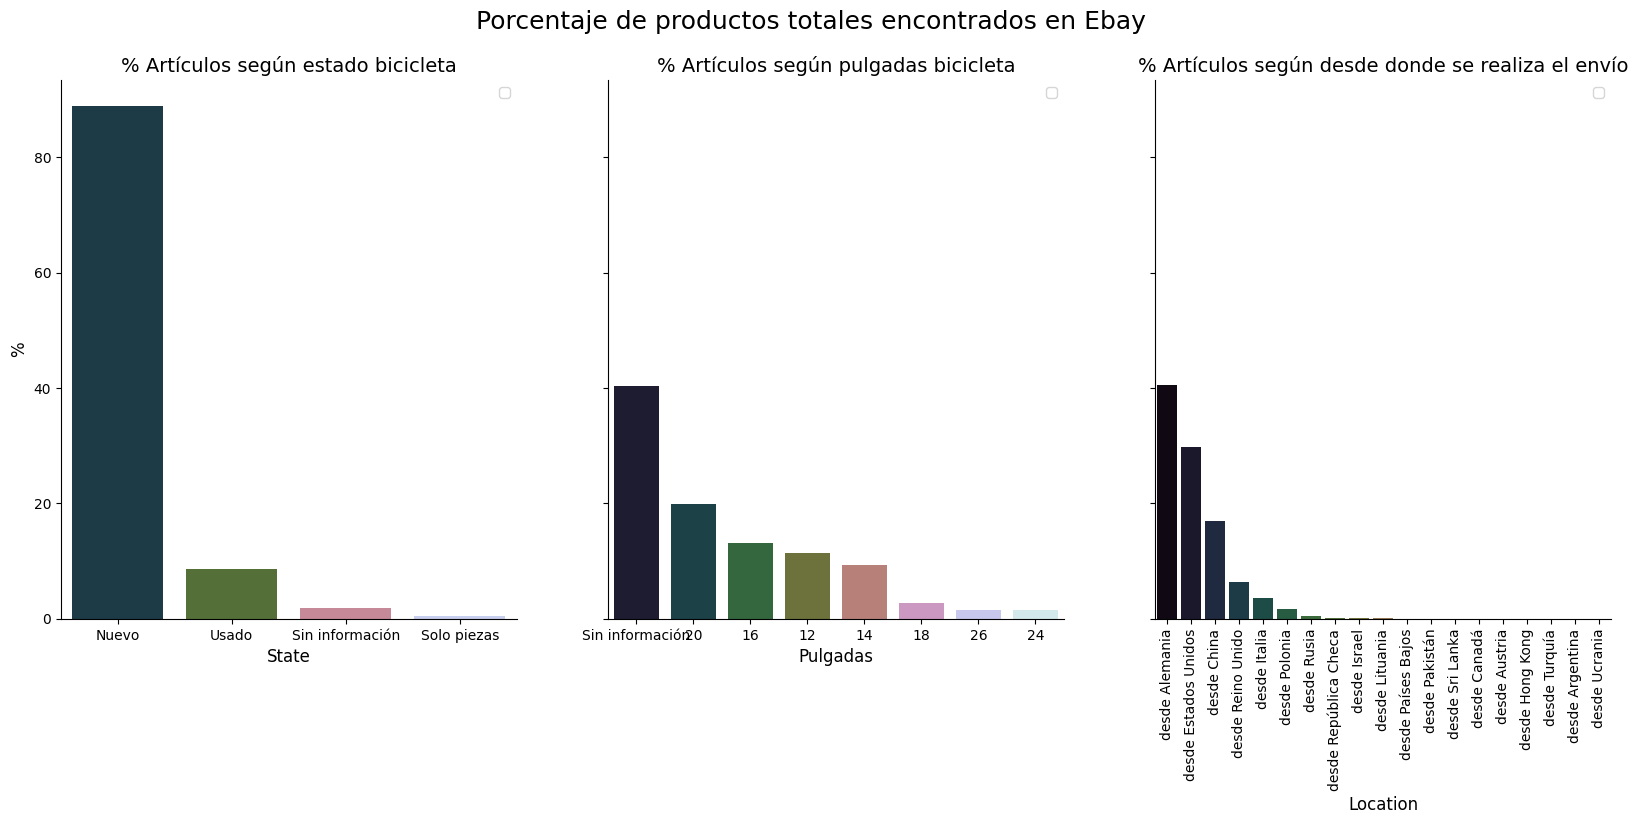

In [44]:
fig, axes = plt.subplots(1, 3, sharex= False, sharey=True, figsize= (20,7))
fig.suptitle('Porcentaje de productos totales encontrados en Ebay', fontsize=18)

sns.barplot(data=count_state, x='State', y='%_state', palette='cubehelix', ax=axes[0], order=orden_columnas_state_general)
axes[0].set_ylabel('%', fontsize = 12)
axes[0].set_xlabel('State', fontsize = 12)
axes[0].set_title('% Artículos según estado bicicleta', fontsize = 14)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].legend()

sns.barplot(data=count_pulgadas, x='Pulgadas', y='%_pulgadas', palette='cubehelix', ax=axes[1], order= orden_columnas_pulgadas_general)
axes[1].set_ylabel('%', fontsize = 12)
axes[1].set_xlabel('Pulgadas', fontsize = 12)
axes[1].set_title('% Artículos según pulgadas bicicleta', fontsize = 14)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].legend()

sns.barplot(data=count_location.head(10), x='Location', y='%_location', palette='cubehelix', ax=axes[2], order = orden_columnas_pais)
axes[2].set_ylabel('%', fontsize = 12)
plt.xticks(rotation=90, fontsize=10)
axes[2].set_xlabel('Location', fontsize = 12)
axes[2].set_title('% Artículos según desde donde se realiza el envío', fontsize = 14)
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].legend();

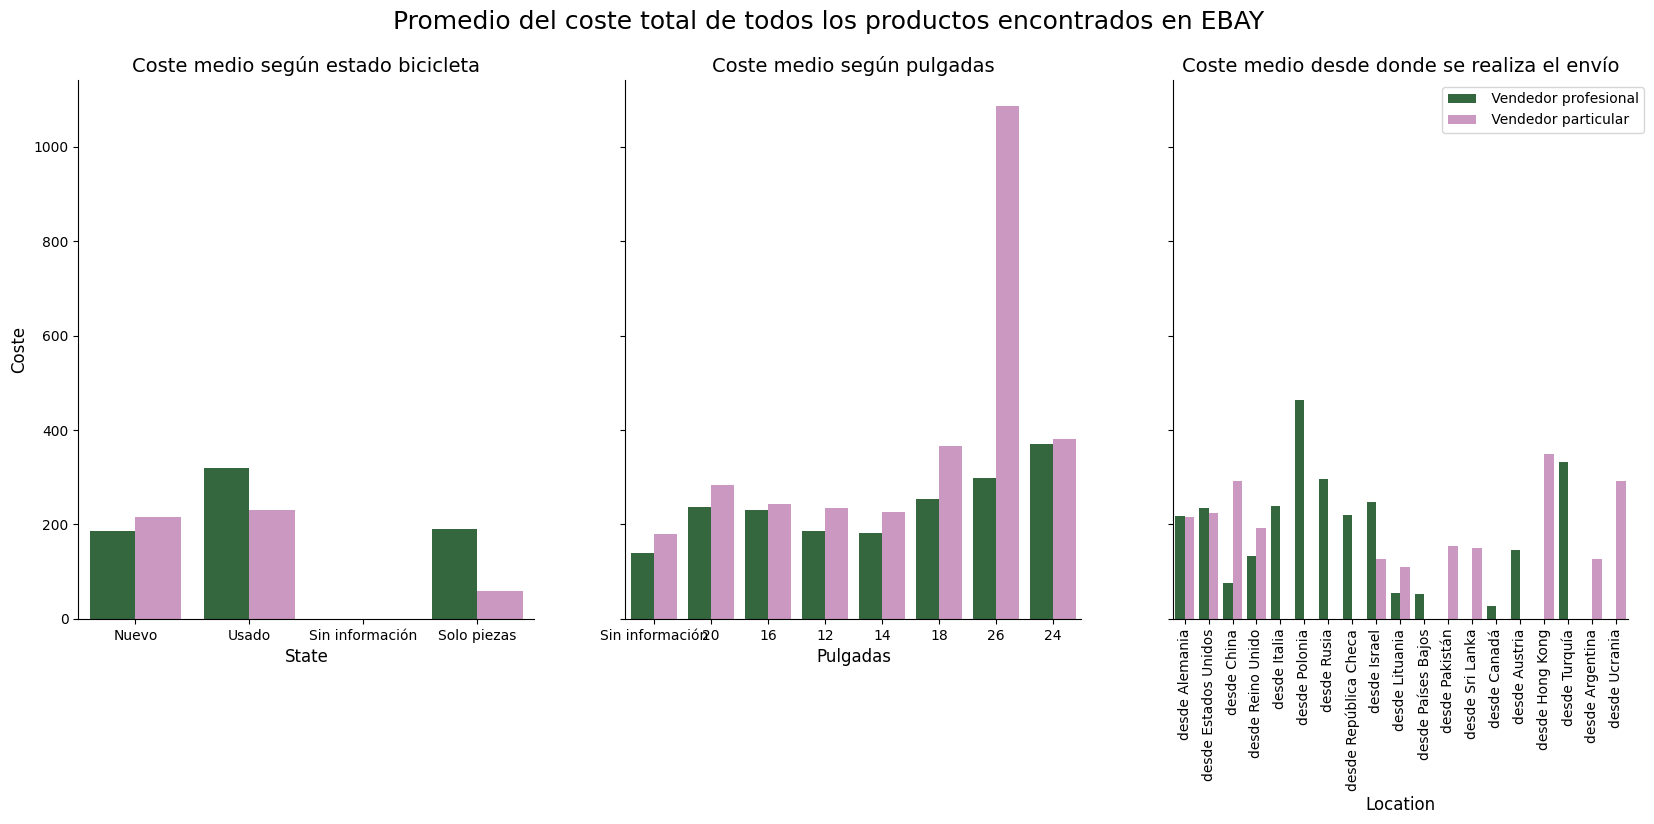

In [45]:
fig, axes = plt.subplots(1, 3, sharex= False, sharey=True, figsize= (20,7))
fig.suptitle('Promedio del coste total de todos los productos encontrados en EBAY', fontsize=18)

sns.barplot(data=df_bicicletas_filtrado.groupby(['State','Seller_type'])[['Price', 'Shipping_cost', 'Total_cost']].mean(), x='State', y='Total_cost', hue='Seller_type', palette='cubehelix', ax=axes[0], order=orden_columnas_state_general, hue_order=orden_Seller_type)
axes[0].set_ylabel('Coste', fontsize = 12)
axes[0].set_xlabel('State', fontsize = 12)
axes[0].set_title('Coste medio según estado bicicleta', fontsize = 14)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].legend().remove()

sns.barplot(data=df_bicicletas_filtrado.groupby(['Pulgadas','Seller_type'])[['Price', 'Shipping_cost', 'Total_cost']].mean(), x='Pulgadas', y='Total_cost', hue='Seller_type', palette='cubehelix', ax=axes[1], order=orden_columnas_pulgadas_general, hue_order=orden_Seller_type)
axes[1].set_ylabel('Coste', fontsize = 12)
axes[1].set_xlabel('Pulgadas', fontsize = 12)
axes[1].set_title('Coste medio según pulgadas', fontsize = 14)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].legend().remove();


sns.barplot(data=df_bicicletas_filtrado.groupby(['Location','Seller_type'])[['Price', 'Shipping_cost', 'Total_cost']].mean(), x='Location', y='Total_cost', hue='Seller_type', palette='cubehelix', ax=axes[2], order=orden_columnas_pais, hue_order=orden_Seller_type)
axes[2].set_ylabel('Coste', fontsize = 12)
plt.xticks(rotation=90, fontsize=10)
axes[2].set_xlabel('Location', fontsize = 12)
axes[2].set_title('Coste medio desde donde se realiza el envío', fontsize = 14)
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].legend(bbox_to_anchor = (1.05,1));

# 4. Creación función para que muestre solo la información de las bicicletas que le interese a la persona

In [46]:
#tipo de bicicletas
print(f'Los tipos de bicicletas que existen de niños son:')
df_detalle_tipo_bicicletas_niños= df_bicicletas_filtrado.groupby("Pulgadas")[['Estatura_niño_cm','Entrepierna_cm','Rango_edad_años']].value_counts().reset_index()
del df_detalle_tipo_bicicletas_niños['count']
display(df_detalle_tipo_bicicletas_niños)

Los tipos de bicicletas que existen de niños son:


,Pulgadas,Estatura_niño_cm,Entrepierna_cm,Rango_edad_años
0,12,85 cm a 103 cm,30 cm,"1,5 - 3"
1,14,103 cm a 107 cm,33 cm,3-4
2,16,107 cm a 119 cm,36 cm,4-6
3,18,119 cm a 125 cm,41 cm,5-7
4,20,125 cm a 130 cm,51 cm,6-8
5,24,130 cm a 140 cm,61 cm,8-12
6,26,140 cm a 160 cm,66 cm ó +,12 ó +


In [47]:
def propuesta_bicicleta_niño ():
    Estatura_niño =float(input(f'Por favor, introduzca la altura del niñ@ en centímetros'))
    if Estatura_niño <85:
        print(f'Según los datos aportados, todavía no puede coger bicicletas de niños')
        pulgadas = None
    if Estatura_niño >=85 and Estatura_niño<103:
        pulgadas = '12'
    if Estatura_niño >=103 and Estatura_niño<107:
        pulgadas = '14'    
    if Estatura_niño >=107 and Estatura_niño<119:
        pulgadas = '16'
    if Estatura_niño >=119 and Estatura_niño<125:
        pulgadas = '18'        
    if Estatura_niño >=125 and Estatura_niño<130:
        pulgadas = '20'      
    if Estatura_niño >=130 and Estatura_niño<140:
        pulgadas = '24'   
    if Estatura_niño >=140 and Estatura_niño<=160:
        pulgadas = '26'
    if Estatura_niño >160:
        print(f'Según los datos aportados, necesitaría una bicicleta de adultos')
        pulgadas = None
    return pulgadas  
     

In [48]:
pulgadas = propuesta_bicicleta_niño() 

In [49]:
if pulgadas == None:
    print(f'Esta búsqueda no le puede facilitar opciones')
else:
    print(f'Según los datos aportados, necesitaría una bicicleta de {pulgadas} pulgadas')

Según los datos aportados, necesitaría una bicicleta de 26 pulgadas


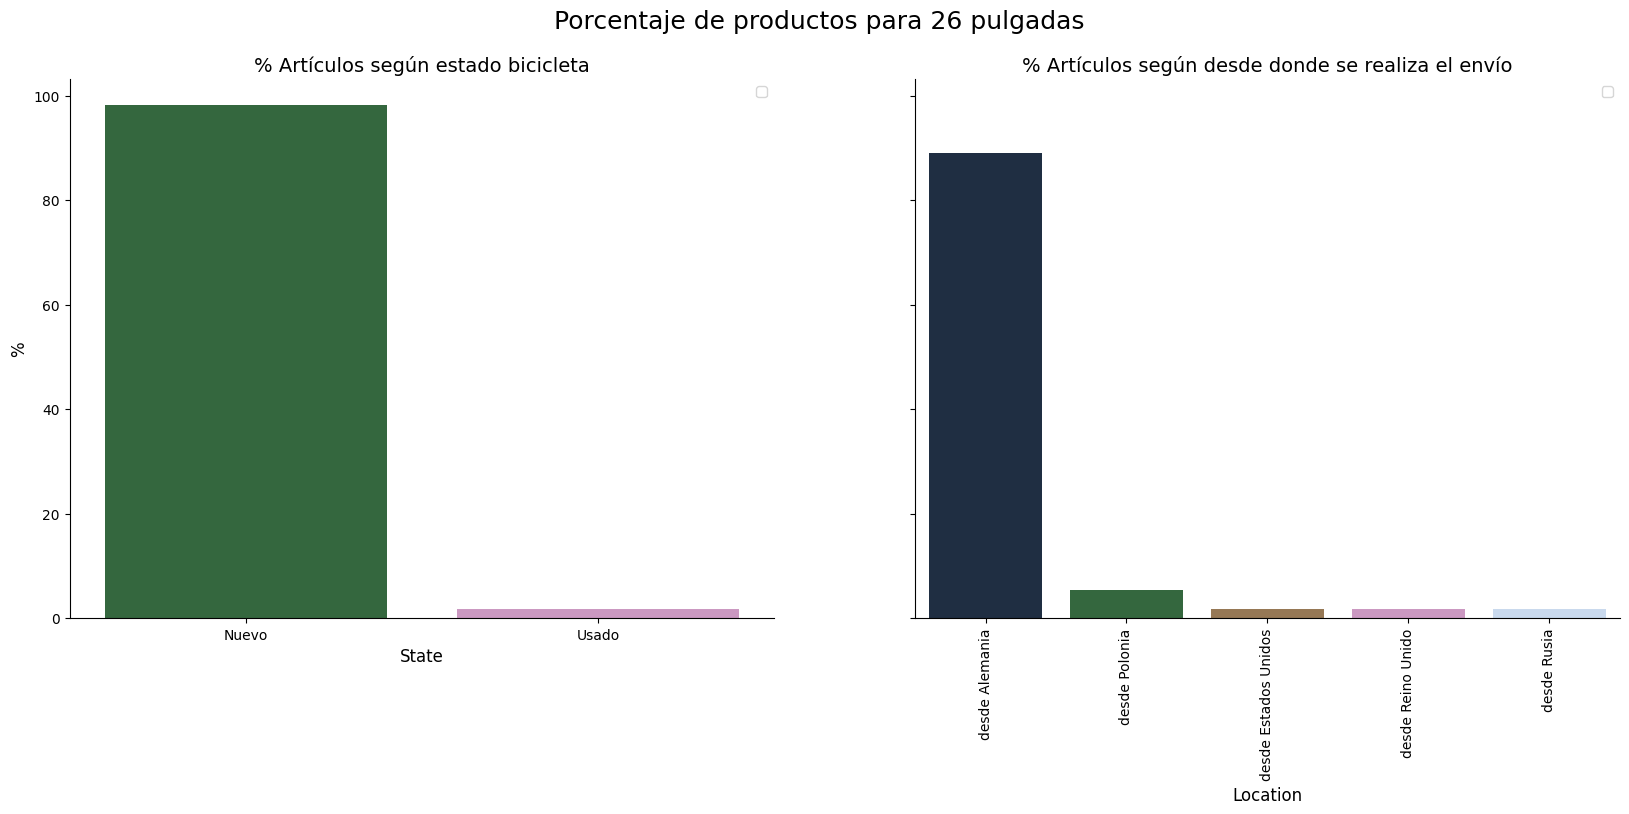

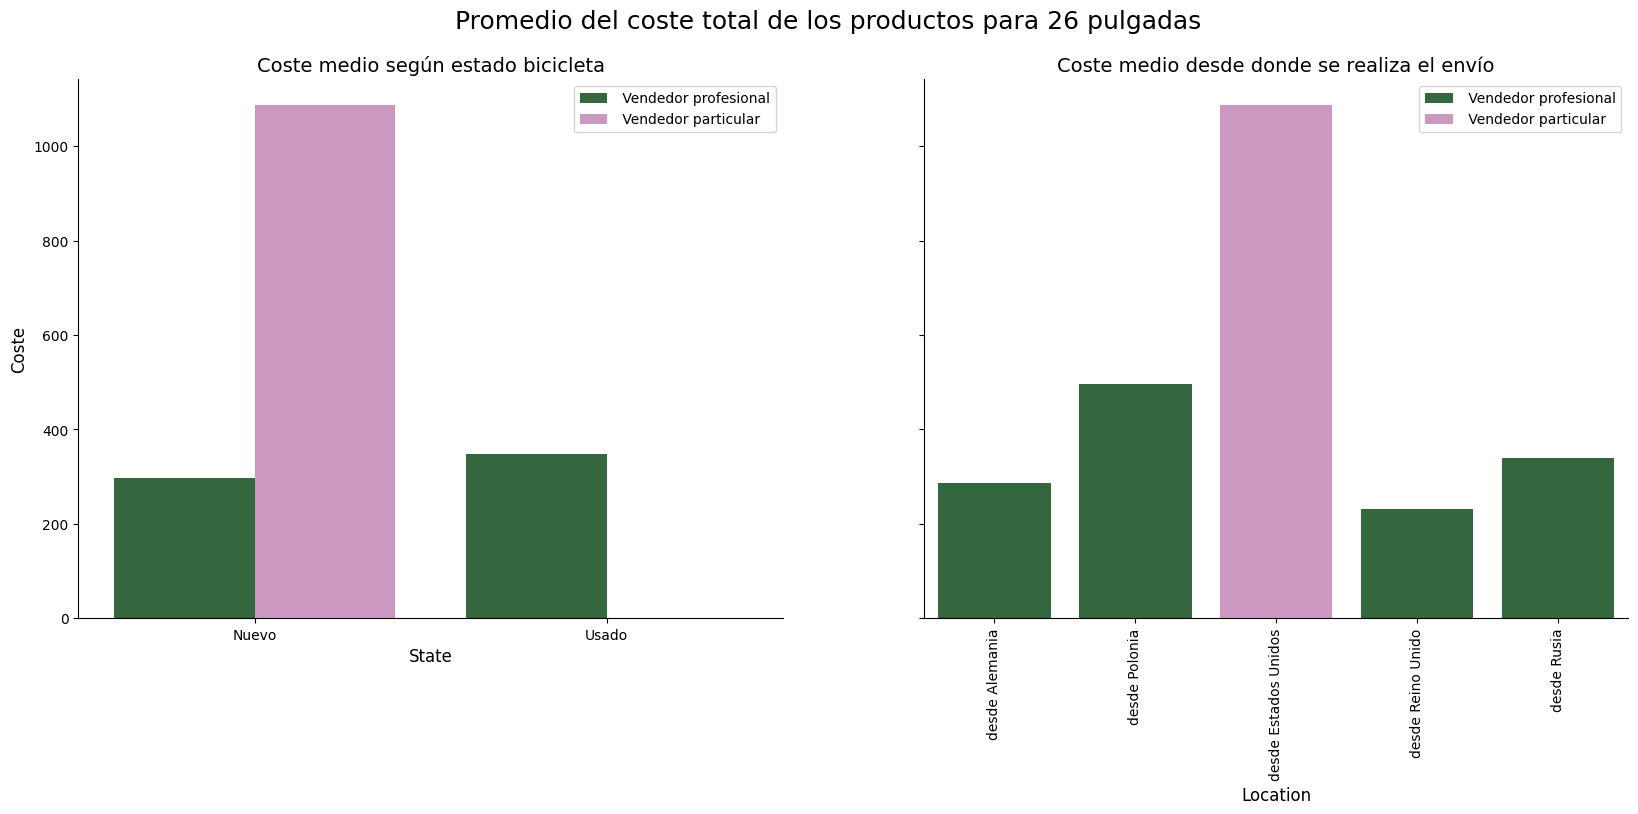

In [50]:
if pulgadas == None:
    print(f'')
else:
    count_state = df_bicicletas_filtrado[df_bicicletas_filtrado.Pulgadas == pulgadas].State.value_counts().reset_index()
    count_state['%_state'] = count_state['count']/count_state['count'].sum()*100
    count_location = df_bicicletas_filtrado[df_bicicletas_filtrado.Pulgadas == pulgadas].Location.value_counts().reset_index()
    count_location['%_location'] = count_location['count']/count_location['count'].sum()*100

     
    orden_columnas= count_location.Location  
    orden_columnas_state = count_state.State 
    orden_Seller_type = df_bicicletas_filtrado.Seller_type.value_counts().index
    fig, axes = plt.subplots(1, 2, sharex= False, sharey=True, figsize= (20,7))
    fig.suptitle(f'Porcentaje de productos para {pulgadas} pulgadas', fontsize=18)
    sns.barplot(data=count_state, x='State', y='%_state', palette='cubehelix', ax=axes[0], order=orden_columnas_state)
    axes[0].set_ylabel('%', fontsize = 12)
    axes[0].set_xlabel('State', fontsize = 12)
    axes[0].set_title('% Artículos según estado bicicleta', fontsize = 14)
    axes[0].spines['right'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[0].legend()

    sns.barplot(data=count_location, x='Location', y='%_location', palette='cubehelix', ax=axes[1], order=orden_columnas)
    axes[1].set_ylabel('%', fontsize = 12)
    plt.xticks(rotation=90, fontsize=10)
    axes[1].set_xlabel('Location', fontsize = 12)
    axes[1].set_title('% Artículos según desde donde se realiza el envío', fontsize = 14)
    axes[1].spines['right'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    axes[1].legend();

        
    fig, axes = plt.subplots(1, 2, sharex= False, sharey=True, figsize= (20,7))
    fig.suptitle(f'Promedio del coste total de los productos para {pulgadas} pulgadas', fontsize=18)
    sns.barplot(data=df_bicicletas_filtrado[df_bicicletas_filtrado.Pulgadas == pulgadas].groupby(['State','Seller_type'])[['Price', 'Shipping_cost', 'Total_cost']].mean(), x='State', y='Total_cost', hue='Seller_type', palette='cubehelix', ax=axes[0], order=orden_columnas_state, hue_order=orden_Seller_type)
    axes[0].set_ylabel('Coste', fontsize = 12)
    axes[0].set_xlabel('State', fontsize = 12)
    axes[0].set_title('Coste medio según estado bicicleta', fontsize = 14)
    axes[0].spines['right'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[0].legend().remove

    sns.barplot(data=df_bicicletas_filtrado[df_bicicletas_filtrado.Pulgadas == pulgadas].groupby(['Location','Seller_type'])[['Price', 'Shipping_cost', 'Total_cost']].mean(), x='Location', y='Total_cost', hue='Seller_type', palette='cubehelix', ax=axes[1], order=orden_columnas, hue_order=orden_Seller_type)
    axes[1].set_ylabel('Coste', fontsize = 12)
    plt.xticks(rotation=90, fontsize=10)
    axes[1].set_xlabel('Location', fontsize = 12)
    axes[1].set_title('Coste medio desde donde se realiza el envío', fontsize = 14)
    axes[1].spines['right'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    axes[1].legend();




In [51]:
if pulgadas == None:
    print(f'')
else:
    print(f'El detalle de los productos disponibles en Ebay para esta categoría son:')
    display(df_bicicletas_filtrado[df_bicicletas_filtrado.Pulgadas == pulgadas][['Title', 'Total_cost', 'State','Seller_type', 'Location']])

El detalle de los productos disponibles en Ebay para esta categoría son:


,Title,Total_cost,State,Seller_type,Location
4,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,215.67,Nuevo,Vendedor profesional,desde Alemania
28,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,216.42,Nuevo,Vendedor profesional,desde Alemania
57,"Bicicleta infantil Frosch 69 Orange 26""",449.00,Nuevo,Vendedor profesional,desde Polonia
83,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,216.46,Nuevo,Vendedor profesional,desde Alemania
138,26 pulgadas bicicleta de hombre bicicleta de niño bicicleta de niños bicicleta de 21 velocidades negra azul -046,215.67,Nuevo,Vendedor profesional,desde Alemania
200,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,216.42,Nuevo,Vendedor profesional,desde Alemania
208,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,240.69,Nuevo,Vendedor profesional,desde Alemania
228,BIKESTAR Hardtail acero bicicleta de montaña Shimano 21 marchas 26 pulgadas MTB,396.80,Nuevo,Vendedor profesional,desde Alemania
238,Bicicleta de montaña BIKESTAR Fully Stahl Shimano 21 velocidades 26 pulgadas MTB,389.80,Nuevo,Vendedor profesional,desde Alemania
266,Bicicleta de 26 pulgadas bicicleta para hombres bicicleta para niños bicicleta para niños 21 velocidades negro azul -046,216.42,Nuevo,Vendedor profesional,desde Alemania


In [52]:
if pulgadas == None:
    print(f'')
else:
    print(f'El enlace a cada una de ellas es:')
    display(df_bicicletas_filtrado[df_bicicletas_filtrado.Pulgadas == pulgadas]['link'])

El enlace a cada una de ellas es:


4                           https://www.ebay.es/itm/146346937446?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7EWQQX0TY39Y9XRNTK&hash=item2212f50c66:g:SBMAAOSwJlpknUgf&itmprp=enc%3AAQAJAAAA8HoV3kP08IDx%2BKZ9MfhVJKlbd721VbtqbrHQ8n26DLVtLr6Gz3x59yDM8NjQa8sGcZtvXOgK9lLNqIYupeZZdLNxdjwzeOV9XD%2BeK9R8bEEFxwf8by%2Fj7X7ppQtSNgJOE3xRKZvGHNFJp%2BDYZAJ3mhUtDHje4dT3TLl9lFqzxuHUlK%2FzH8yUmgaFlh4KF1y%2BtyNbOls76KwkkgZPgyJbKoHDqc2VMfgQiy1epGQgpDmJVkTaBajVJzDhcmP9UrZNumuE4zyBJUPU%2F9ck7CxEqp3DRi5CP4jCPc5jFyZCEbWGAVrdHMTSzWdrhPN1um5fjg%3D%3D%7Ctkp%3ABk9SR_TzooWTZQ
28                                                                      https://www.ebay.es/itm/405336541444?_skw=bicicleta+ni%C3%B1os&itmmeta=01JJC58Q7ED25B8J1G66SV2Z2S&hash=item5e5ff0c904:g:FVsAAOSwHrJknTMW&itmprp=enc%3AAQAJAAAA0HoV3kP08IDx%2BKZ9MfhVJKkr%2F9QnsCp5Pr%2BwIMG0wu0RIik1KvLZbkcIMmn9O2yO59H8rBYWWcea94N4vS%2F2GyOXSxYn7MA%2FBjpXa5qFU46GFOlZzptxjsV9pxww4ir3RzaMmgWq%2Bo1cvjjxLFl2UuJDBDn3dHAx3VLwiZXA%2FdTSJ0Lw35Ek61KkViRq5kQU3Ntoz55tVcSN